In [36]:
# Install required packages
import subprocess
import sys

def install_package(package):
    """Install a package using pip"""
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✅ {package} installed successfully")
    except subprocess.CalledProcessError:
        print(f"❌ Failed to install {package}")

# List of required packages
required_packages = [
    'pandas',
    'numpy', 
    'matplotlib',
    'seaborn',
    'wordcloud',
    'python-bidi',  # For Hebrew RTL text support
    'arabic-reshaper'  # Additional RTL text support
]

print("🔧 Installing required packages...")
print("=" * 50)

for package in required_packages:
    install_package(package)

print("=" * 50)
print("✅ All packages installation completed!")
print("📝 Note: Built-in packages (json, datetime, re, collections, warnings) don't need installation")
print("🔤 Added RTL (Hebrew) text support packages: python-bidi, arabic-reshaper")


🔧 Installing required packages...
Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


✅ pandas installed successfully
Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


✅ numpy installed successfully
Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


✅ matplotlib installed successfully
Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


✅ seaborn installed successfully
Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


✅ wordcloud installed successfully
Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


✅ python-bidi installed successfully
Defaulting to user installation because normal site-packages is not writeable
✅ arabic-reshaper installed successfully
✅ All packages installation completed!
📝 Note: Built-in packages (json, datetime, re, collections, warnings) don't need installation
🔤 Added RTL (Hebrew) text support packages: python-bidi, arabic-reshaper



[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


# Songs Database Analysis & Visualization

This notebook analyzes the songs.json database focusing on song names, artists, and creation/modification dates.
It provides comprehensive visualizations of interesting insights and trends in the music collection.

**✨ Features Hebrew RTL text support** - Hebrew artist names and text display correctly in all visualizations!

## Key Findings Summary:
- **1,563 total songs** from **625 unique artists**
- **74.9% Hebrew songs** vs **25.1% English songs**
- **אריק איינשטיין** is the most prolific artist (40 songs)
- **2018** was the most active year (759 songs created)
- **44.2%** of songs were later modified


In [37]:
# Configure Hebrew/RTL text support for matplotlib
import arabic_reshaper
from bidi.algorithm import get_display

def fix_hebrew_text(text):
    """
    Fix Hebrew text display for matplotlib by handling RTL text properly
    """
    if not isinstance(text, str):
        return str(text)
    
    # Check if text contains Hebrew characters
    hebrew_pattern = re.compile(r'[\u0590-\u05FF]')
    if hebrew_pattern.search(text):
        # Reshape and reorder for proper RTL display
        reshaped_text = arabic_reshaper.reshape(text)
        bidi_text = get_display(reshaped_text)
        return bidi_text
    else:
        # Return as-is for non-Hebrew text
        return text

def fix_labels_list(labels_list):
    """
    Fix a list of labels that may contain Hebrew text
    """
    return [fix_hebrew_text(label) for label in labels_list]

# Test the Hebrew fix function
test_hebrew = "אריק איינשטיין"
print(f"Original Hebrew text: {test_hebrew}")
print(f"Fixed Hebrew text: {fix_hebrew_text(test_hebrew)}")
print("✅ Hebrew RTL text support configured!")

# Set matplotlib to support Unicode properly
plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial Unicode MS', 'Tahoma', 'sans-serif']
print("✅ Matplotlib Unicode font support enabled!")


Original Hebrew text: אריק איינשטיין
Fixed Hebrew text: ןייטשנייא קירא
✅ Hebrew RTL text support configured!
✅ Matplotlib Unicode font support enabled!


In [38]:
# Import required libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime
import re
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("Libraries imported successfully!")


Libraries imported successfully!


In [39]:
# Load and process the songs data
print("Loading songs data...")

with open('songs.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

songs = data.get('songs', [])
print(f"Loaded {len(songs)} songs")

# Extract relevant fields including lyrics information
song_records = []
for song in songs:
    lyrics_info = song.get('lyrics', {})
    markup_url = lyrics_info.get('markupUrl', '')
    image_url = lyrics_info.get('imageUrl', '')
    
    record = {
        'id': song.get('id'),
        'name': song.get('name', ''),
        'singer': song.get('singer', ''),
        'dateCreated': song.get('dateCreated'),
        'dateModified': song.get('dateModified'),
        'categoryIds': song.get('categoryIds', []),
        'markupUrl': markup_url,
        'imageUrl': image_url
    }
    song_records.append(record)

df = pd.DataFrame(song_records)

# Convert timestamps
def timestamp_to_ddmmyy(timestamp):
    if pd.isna(timestamp) or timestamp == 0:
        return None
    try:
        dt = datetime.fromtimestamp(timestamp / 1000)
        return dt.strftime('%d%m%y')
    except (ValueError, OSError):
        return None

df['dateCreated_formatted'] = df['dateCreated'].apply(timestamp_to_ddmmyy)
df['dateModified_formatted'] = df['dateModified'].apply(timestamp_to_ddmmyy)
df['dateCreated_dt'] = pd.to_datetime(df['dateCreated'], unit='ms', errors='coerce')
df['dateModified_dt'] = pd.to_datetime(df['dateModified'], unit='ms', errors='coerce')

# Identify migration date (February 25, 2018)
MIGRATION_DATE = pd.Timestamp('2018-02-25')
df['is_migration_day'] = df['dateCreated_dt'].dt.date == MIGRATION_DATE.date()

migration_songs = df['is_migration_day'].sum()
print(f"🔄 Identified {migration_songs} songs from migration day (Feb 25, 2018)")

# Language detection
hebrew_pattern = re.compile(r'[\u0590-\u05FF]')
df['has_hebrew'] = df['name'].apply(lambda x: bool(hebrew_pattern.search(str(x))))
df['language'] = df['has_hebrew'].map({True: 'Hebrew', False: 'English'})

# Contributor detection based on lyrics URLs
def detect_contributor(row):
    """Detect contributor based on lyrics markupUrl or imageUrl patterns"""
    markup_url = str(row.get('markupUrl', ''))
    image_url = str(row.get('imageUrl', ''))
    language = row.get('language', '')
    
    # Check both markup and image URLs for patterns
    combined_url = markup_url + ' ' + image_url
    
    if 'hebrew_alon' in combined_url:
        return 'ALON_HEBREW'
    elif 'hebrew_ophir' in combined_url:
        return 'OPHIR_HEBREW'
    elif 'english_alon' in combined_url:
        return 'ALON_ENGLISH'
    elif 'english_ophir' in combined_url:
        return 'OPHIR_ENGLISH'
    else:
        # Fallback based on language if URL pattern unclear
        if language == 'Hebrew':
            return 'UNKNOWN_HEBREW'
        else:
            return 'UNKNOWN_ENGLISH'

df['contributor'] = df.apply(detect_contributor, axis=1)

# Additional derived fields
df['name_length'] = df['name'].str.len()
df['year_created'] = df['dateCreated_dt'].dt.year
df['days_to_modify'] = (df['dateModified_dt'] - df['dateCreated_dt']).dt.days

print(f"Data processed successfully! Shape: {df.shape}")
print(f"\n📊 Contributor Distribution:")
contributor_counts = df['contributor'].value_counts()
for contributor, count in contributor_counts.items():
    print(f"   • {contributor}: {count} songs ({count/len(df)*100:.1f}%)")

print(f"\nSample data:")
print(df[['name', 'singer', 'language', 'contributor', 'is_migration_day']].head())


Loading songs data...
Loaded 1563 songs
🔄 Identified 604 songs from migration day (Feb 25, 2018)
Data processed successfully! Shape: (1563, 19)

📊 Contributor Distribution:
   • ALON_HEBREW: 688 songs (44.0%)
   • OPHIR_HEBREW: 483 songs (30.9%)
   • OPHIR_ENGLISH: 280 songs (17.9%)
   • ALON_ENGLISH: 112 songs (7.2%)

Sample data:
                name        singer language   contributor  is_migration_day
0         בך לא נוגע   יהודית רביץ   Hebrew  OPHIR_HEBREW             False
1      חלומות שמורים      מתי כספי   Hebrew  OPHIR_HEBREW              True
2      משחק של דמעות  נקמת הטרקטור   Hebrew  OPHIR_HEBREW              True
3  בלילות של ירח מלא       ערן צור   Hebrew  OPHIR_HEBREW              True
4         יעלה ויבוא      גידי גוב   Hebrew  OPHIR_HEBREW              True


## 1. Artist Analysis


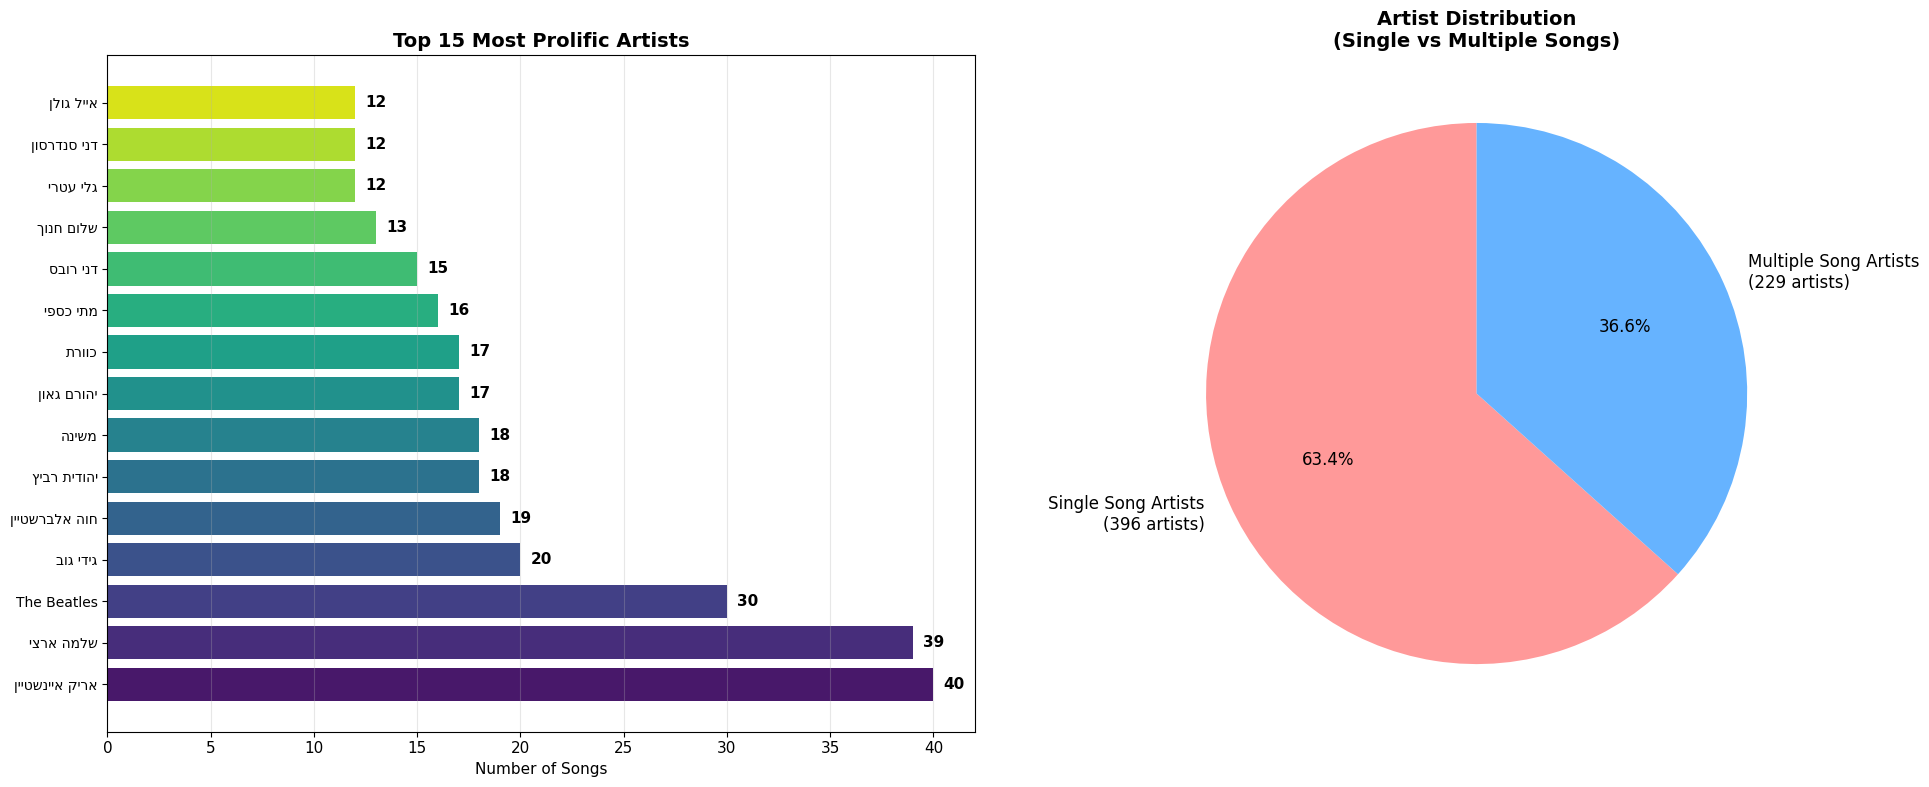

Total unique artists: 625
Average songs per artist: 2.5


In [40]:
# Top Artists by Song Count
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Top 15 artists
top_artists = df['singer'].value_counts().head(15)
colors = sns.color_palette("viridis", len(top_artists))

bars = ax1.barh(range(len(top_artists)), top_artists.values, color=colors)
ax1.set_yticks(range(len(top_artists)))
# Fix Hebrew text in artist names
fixed_artist_labels = fix_labels_list(top_artists.index)
ax1.set_yticklabels(fixed_artist_labels, fontsize=10)
ax1.set_xlabel('Number of Songs')
ax1.set_title('Top 15 Most Prolific Artists', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, top_artists.values)):
    ax1.text(value + 0.5, i, str(value), va='center', fontweight='bold')

# Artist distribution (single vs multiple songs)
artist_counts = df['singer'].value_counts()
single_song = len(artist_counts[artist_counts == 1])
multiple_songs = len(artist_counts[artist_counts > 1])

labels = ['Single Song Artists', 'Multiple Song Artists']
sizes = [single_song, multiple_songs]
colors_pie = ['#ff9999', '#66b3ff']

wedges, texts, autotexts = ax2.pie(sizes, labels=labels, colors=colors_pie, autopct='%1.1f%%', 
                                   startangle=90, textprops={'fontsize': 12})
ax2.set_title('Artist Distribution\n(Single vs Multiple Songs)', fontsize=14, fontweight='bold')

# Add counts to the pie chart
for i, (label, size) in enumerate(zip(labels, sizes)):
    texts[i].set_text(f'{label}\n({size} artists)')

plt.tight_layout()
plt.show()

print(f"Total unique artists: {len(artist_counts):,}")
print(f"Average songs per artist: {len(df) / len(artist_counts):.1f}")


## 2. Language & Song Name Analysis


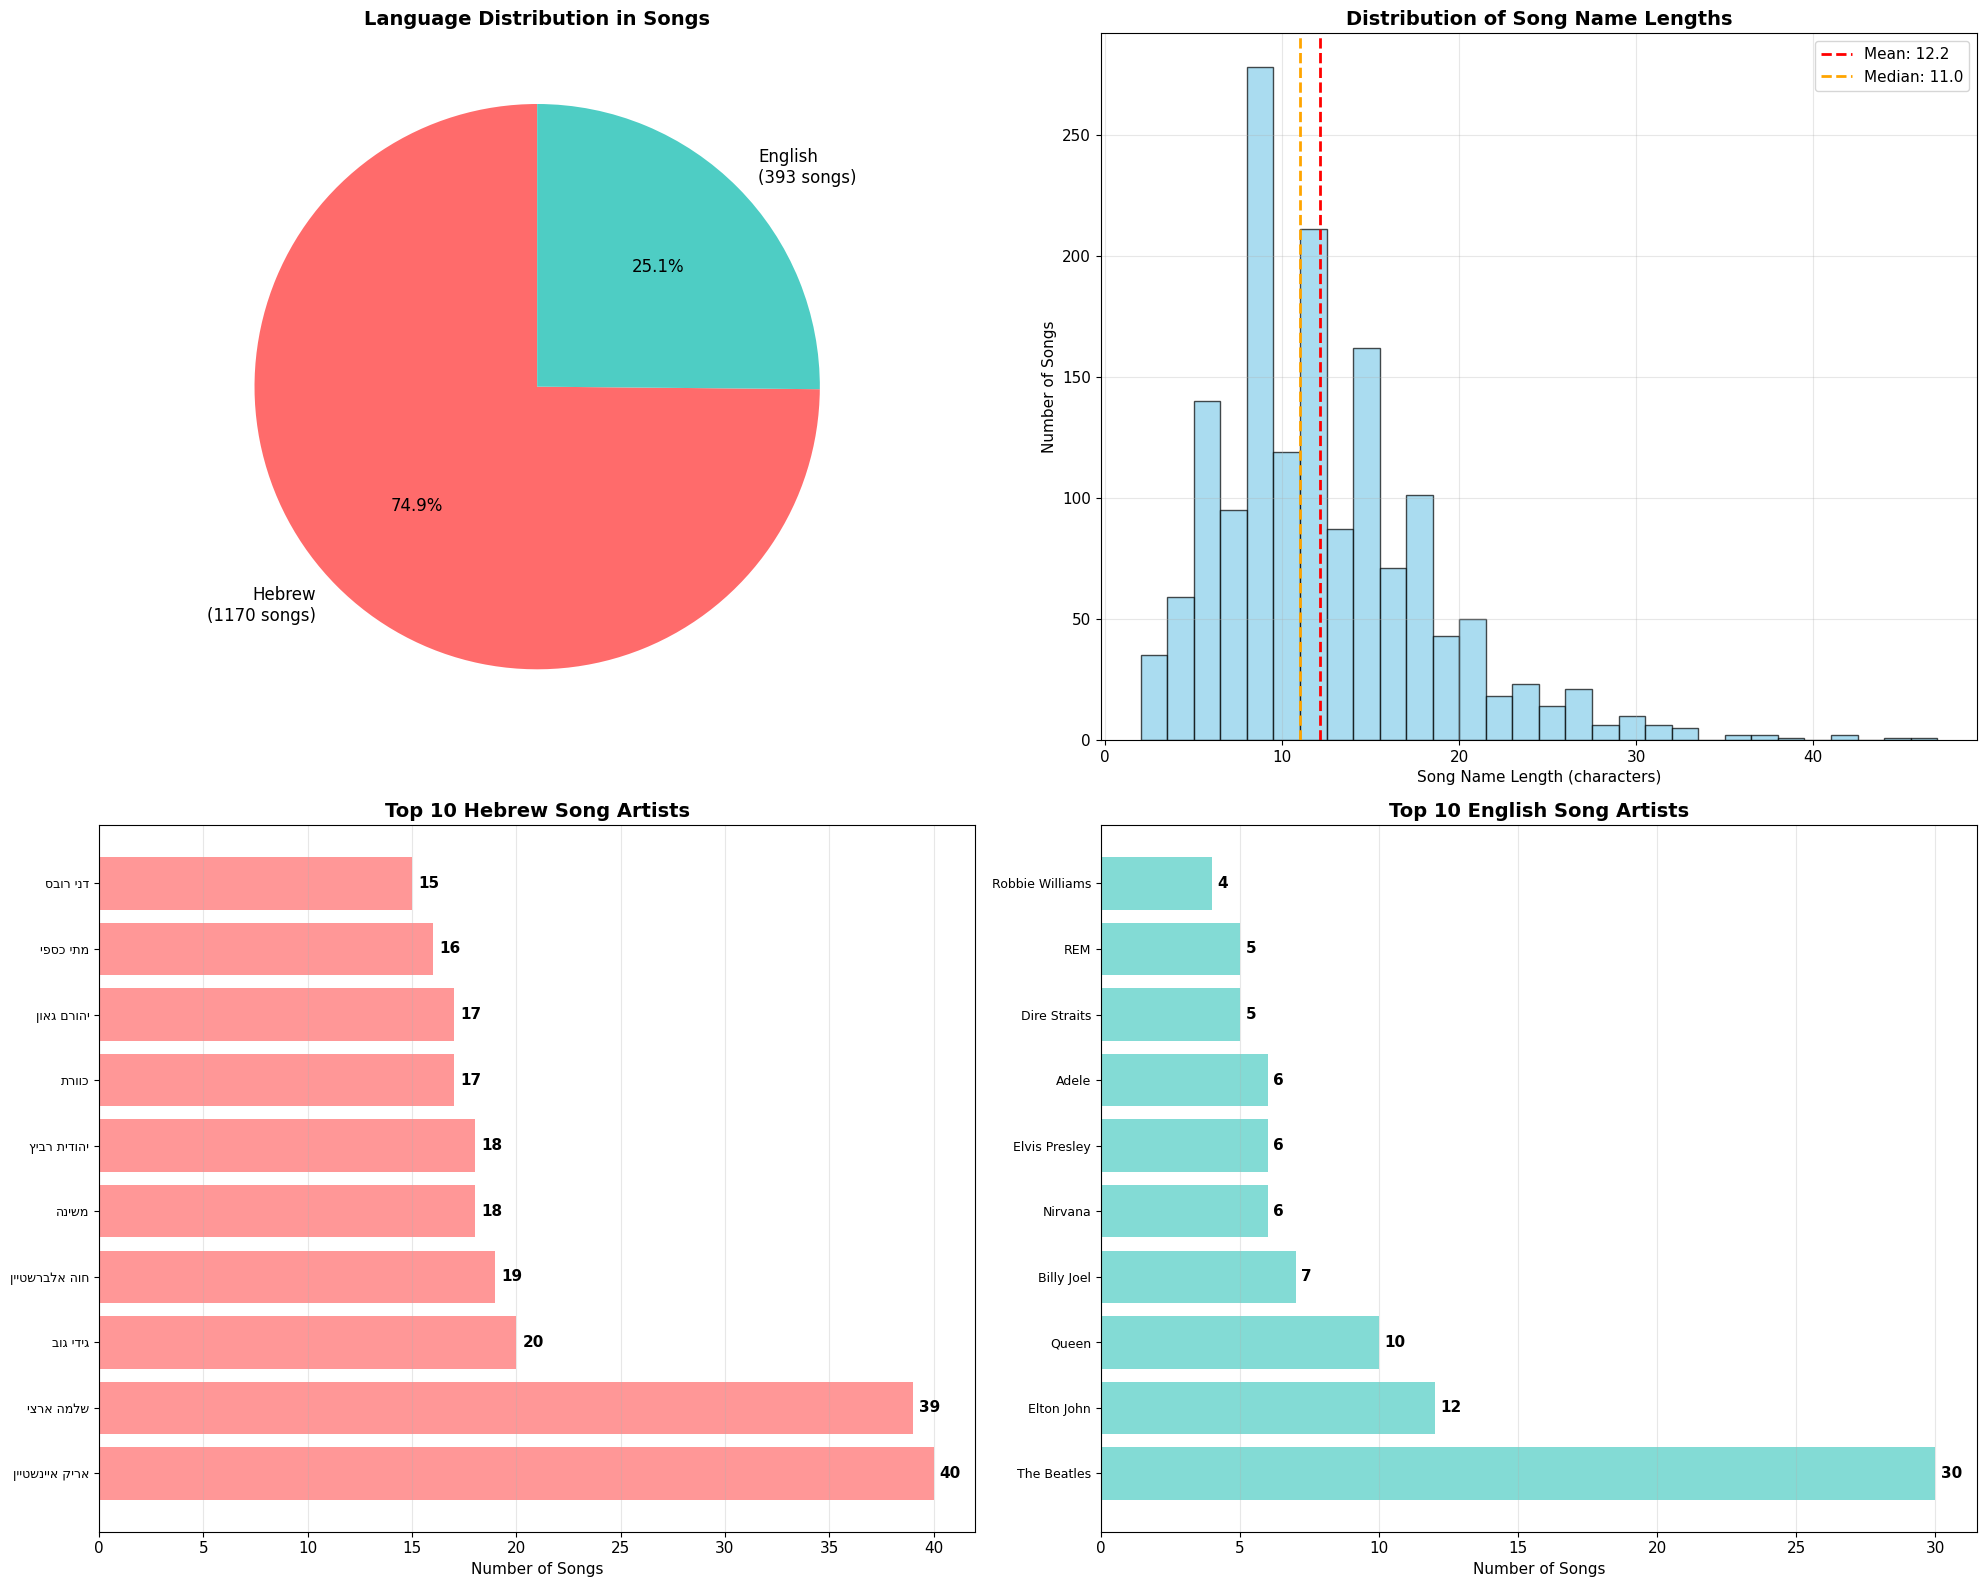

In [41]:
# Language Distribution and Song Name Analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# 1. Language Distribution Pie Chart
language_counts = df['language'].value_counts()
colors_lang = ['#ff6b6b', '#4ecdc4']

wedges, texts, autotexts = ax1.pie(language_counts.values, labels=language_counts.index, 
                                   colors=colors_lang, autopct='%1.1f%%', startangle=90,
                                   textprops={'fontsize': 12})
ax1.set_title('Language Distribution in Songs', fontsize=14, fontweight='bold')

# Add counts to labels
for i, (label, count) in enumerate(zip(language_counts.index, language_counts.values)):
    texts[i].set_text(f'{label}\n({count} songs)')

# 2. Song Name Length Distribution
ax2.hist(df['name_length'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
ax2.axvline(df['name_length'].mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {df["name_length"].mean():.1f}')
ax2.axvline(df['name_length'].median(), color='orange', linestyle='--', linewidth=2,
           label=f'Median: {df["name_length"].median():.1f}')
ax2.set_xlabel('Song Name Length (characters)')
ax2.set_ylabel('Number of Songs')
ax2.set_title('Distribution of Song Name Lengths', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# 3. Top Artists by Language
hebrew_artists = df[df['language'] == 'Hebrew']['singer'].value_counts().head(10)
english_artists = df[df['language'] == 'English']['singer'].value_counts().head(10)

y_pos = np.arange(len(hebrew_artists))
bars = ax3.barh(y_pos, hebrew_artists.values, color='#ff6b6b', alpha=0.7)
ax3.set_yticks(y_pos)
# Fix Hebrew text in artist names
fixed_hebrew_artists = fix_labels_list(hebrew_artists.index)
ax3.set_yticklabels(fixed_hebrew_artists, fontsize=9)
ax3.set_xlabel('Number of Songs')
ax3.set_title('Top 10 Hebrew Song Artists', fontsize=14, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, hebrew_artists.values)):
    ax3.text(value + 0.3, i, str(value), va='center', fontweight='bold')

# 4. English Artists
y_pos = np.arange(len(english_artists))
bars = ax4.barh(y_pos, english_artists.values, color='#4ecdc4', alpha=0.7)
ax4.set_yticks(y_pos)
# English artists don't need Hebrew fixing, but apply for consistency
fixed_english_artists = fix_labels_list(english_artists.index)
ax4.set_yticklabels(fixed_english_artists, fontsize=9)
ax4.set_xlabel('Number of Songs')
ax4.set_title('Top 10 English Song Artists', fontsize=14, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, english_artists.values)):
    ax4.text(value + 0.2, i, str(value), va='center', fontweight='bold')

plt.tight_layout()
plt.show()


## 3. Temporal Analysis - Creation & Modification Patterns


📊 Temporal Analysis: Using 959 songs (excluding 604 migration day songs)


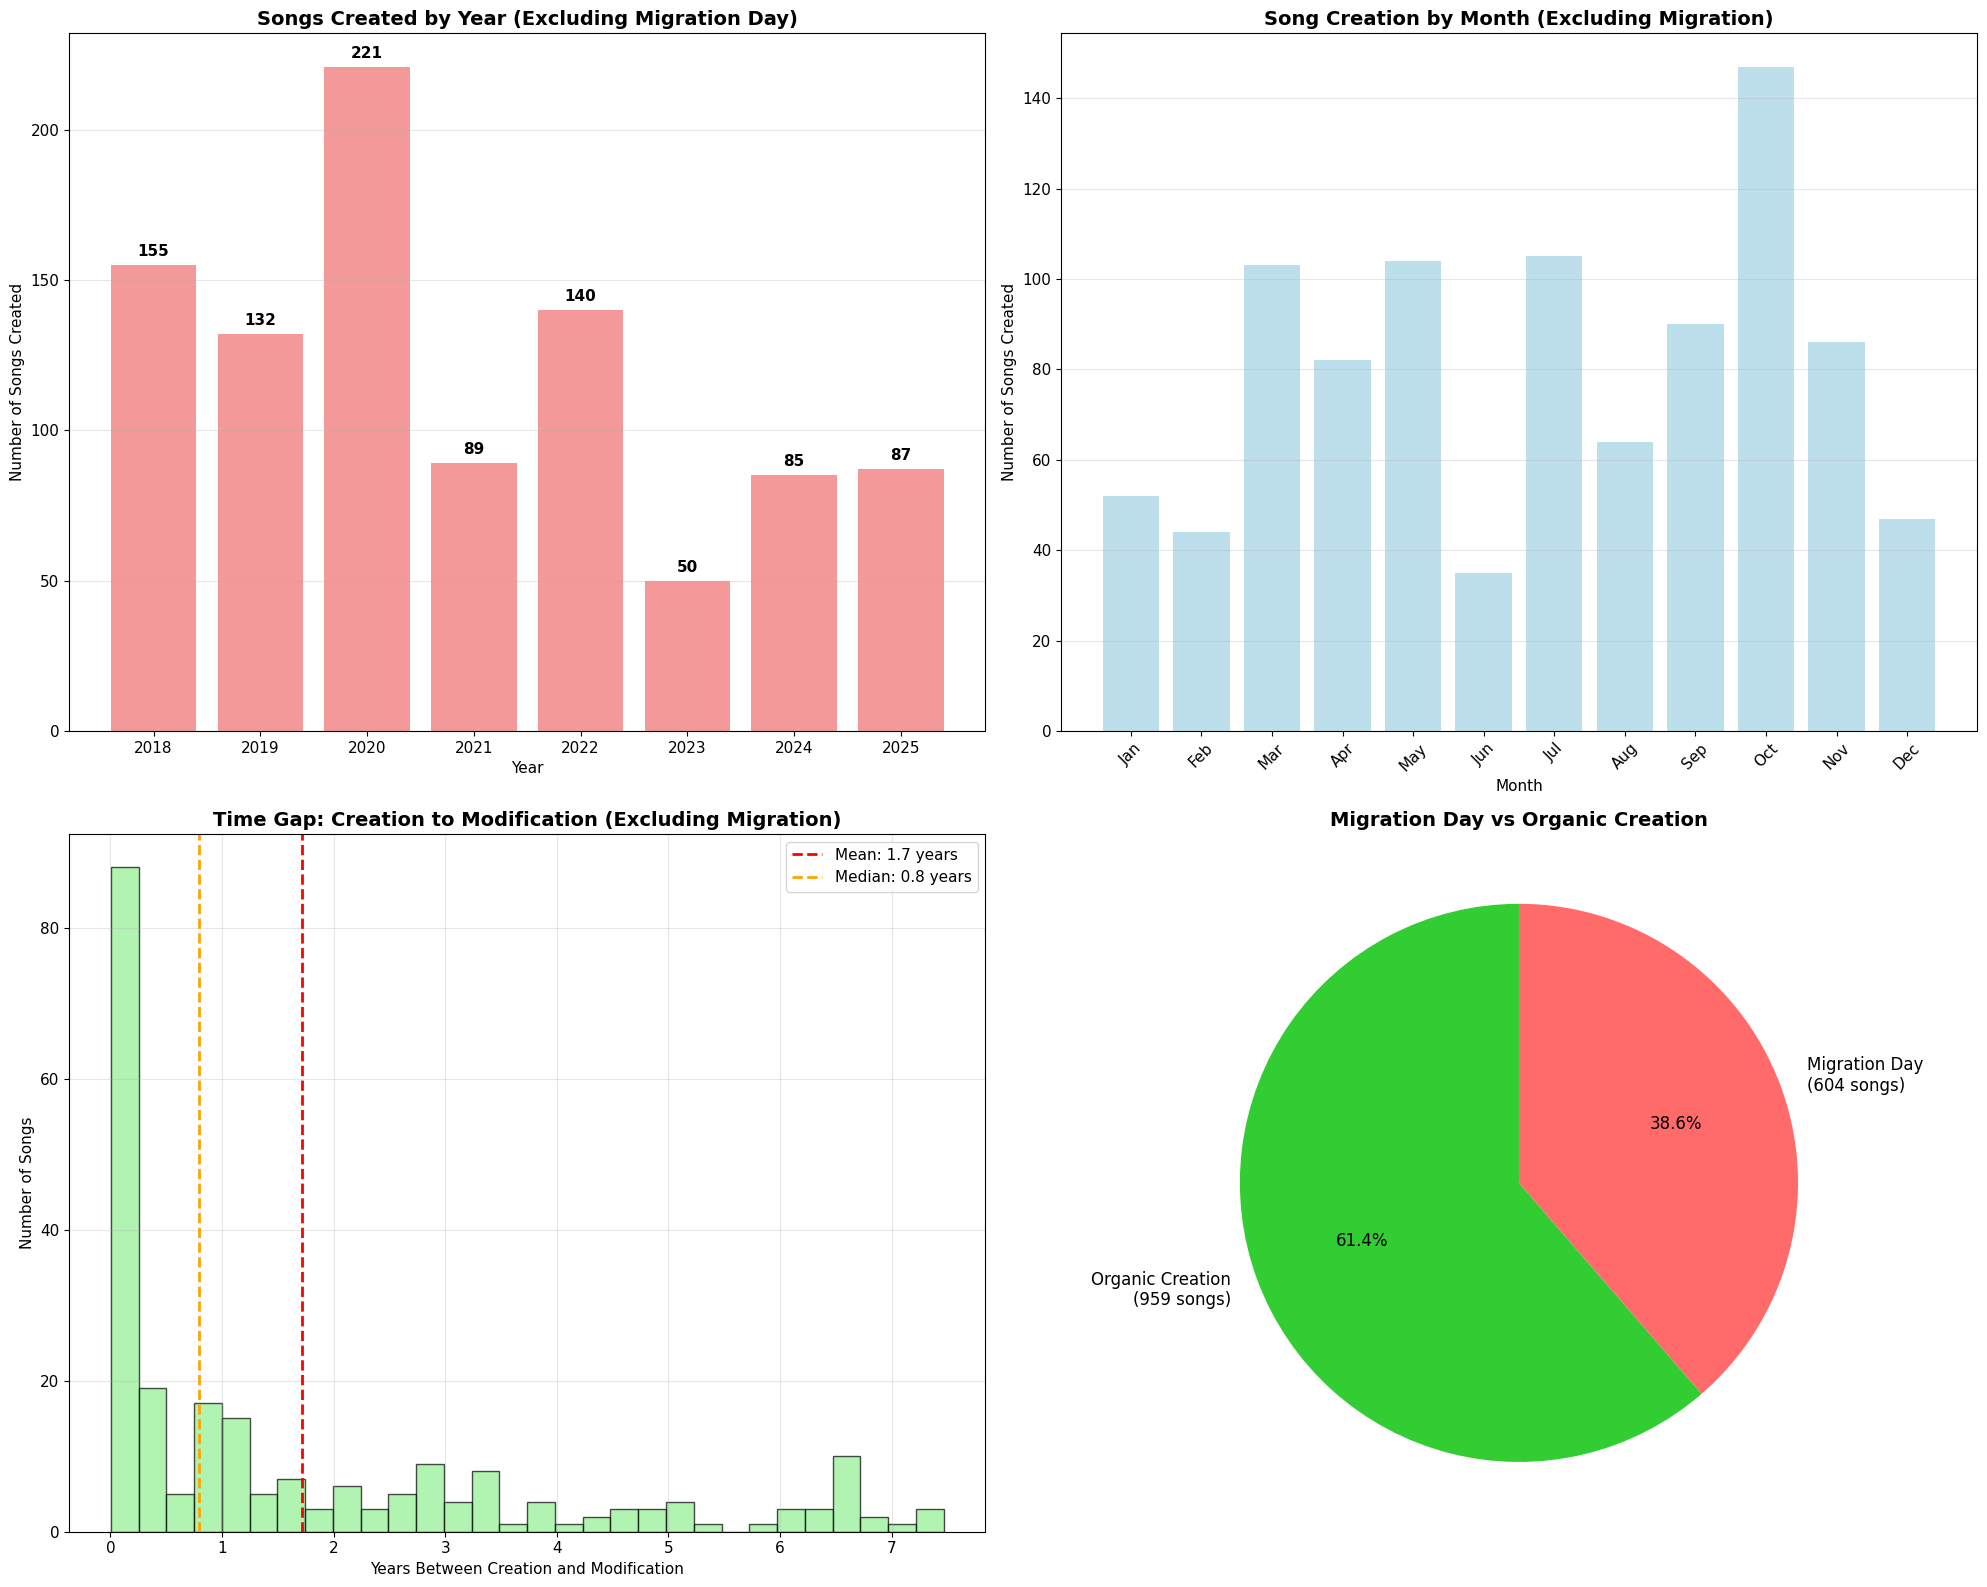

Peak creation year (excluding migration): 2020 with 221 songs
Migration day songs: 604 (38.6%)
Organic creation songs: 959 (61.4%)


In [42]:
# Temporal Analysis (Excluding Migration Day Data)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# Filter out migration day for temporal analysis
non_migration_df = df[~df['is_migration_day']].copy()
print(f"📊 Temporal Analysis: Using {len(non_migration_df)} songs (excluding {df['is_migration_day'].sum()} migration day songs)")

# 1. Songs Created by Year (excluding migration day)
yearly_counts = non_migration_df['year_created'].value_counts().sort_index()
bars = ax1.bar(yearly_counts.index, yearly_counts.values, color='lightcoral', alpha=0.8)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Songs Created')
ax1.set_title('Songs Created by Year (Excluding Migration Day)', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, yearly_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, 
             str(value), ha='center', va='bottom', fontweight='bold')

# 2. Monthly Creation Pattern (excluding migration day)
non_migration_df['month_created'] = non_migration_df['dateCreated_dt'].dt.month
monthly_counts = non_migration_df['month_created'].value_counts().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

bars = ax2.bar(monthly_counts.index, monthly_counts.values, color='lightblue', alpha=0.8)
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of Songs Created')
ax2.set_title('Song Creation by Month (Excluding Migration)', fontsize=14, fontweight='bold')
ax2.set_xticks(monthly_counts.index)
ax2.set_xticklabels([month_names[i-1] for i in monthly_counts.index], rotation=45)
ax2.grid(axis='y', alpha=0.3)

# 3. Time Gap Between Creation and Modification (excluding migration day)
modified_later = non_migration_df[non_migration_df['days_to_modify'] > 0]
if len(modified_later) > 0:
    # Convert days to years for better visualization
    years_to_modify = modified_later['days_to_modify'] / 365.25
    
    ax3.hist(years_to_modify, bins=30, color='lightgreen', alpha=0.7, edgecolor='black')
    ax3.axvline(years_to_modify.mean(), color='red', linestyle='--', linewidth=2,
               label=f'Mean: {years_to_modify.mean():.1f} years')
    ax3.axvline(years_to_modify.median(), color='orange', linestyle='--', linewidth=2,
               label=f'Median: {years_to_modify.median():.1f} years')
    ax3.set_xlabel('Years Between Creation and Modification')
    ax3.set_ylabel('Number of Songs')
    ax3.set_title('Time Gap: Creation to Modification (Excluding Migration)', fontsize=14, fontweight='bold')
    ax3.legend()
    ax3.grid(alpha=0.3)

# 4. Migration vs Organic Creation
migration_count = df['is_migration_day'].sum()
organic_count = len(df) - migration_count
migration_stats = [organic_count, migration_count]
labels = ['Organic Creation', 'Migration Day']
colors = ['#32cd32', '#ff6b6b']

wedges, texts, autotexts = ax4.pie(migration_stats, labels=labels, colors=colors, 
                                   autopct='%1.1f%%', startangle=90,
                                   textprops={'fontsize': 12})
ax4.set_title('Migration Day vs Organic Creation', fontsize=14, fontweight='bold')

# Add counts to labels
for i, (label, count) in enumerate(zip(labels, migration_stats)):
    texts[i].set_text(f'{label}\n({count} songs)')

plt.tight_layout()
plt.show()

print(f"Peak creation year (excluding migration): {yearly_counts.idxmax()} with {yearly_counts.max()} songs")
print(f"Migration day songs: {migration_count} ({migration_count/len(df)*100:.1f}%)")
print(f"Organic creation songs: {organic_count} ({organic_count/len(df)*100:.1f}%)")


## 4. Word Cloud Analysis


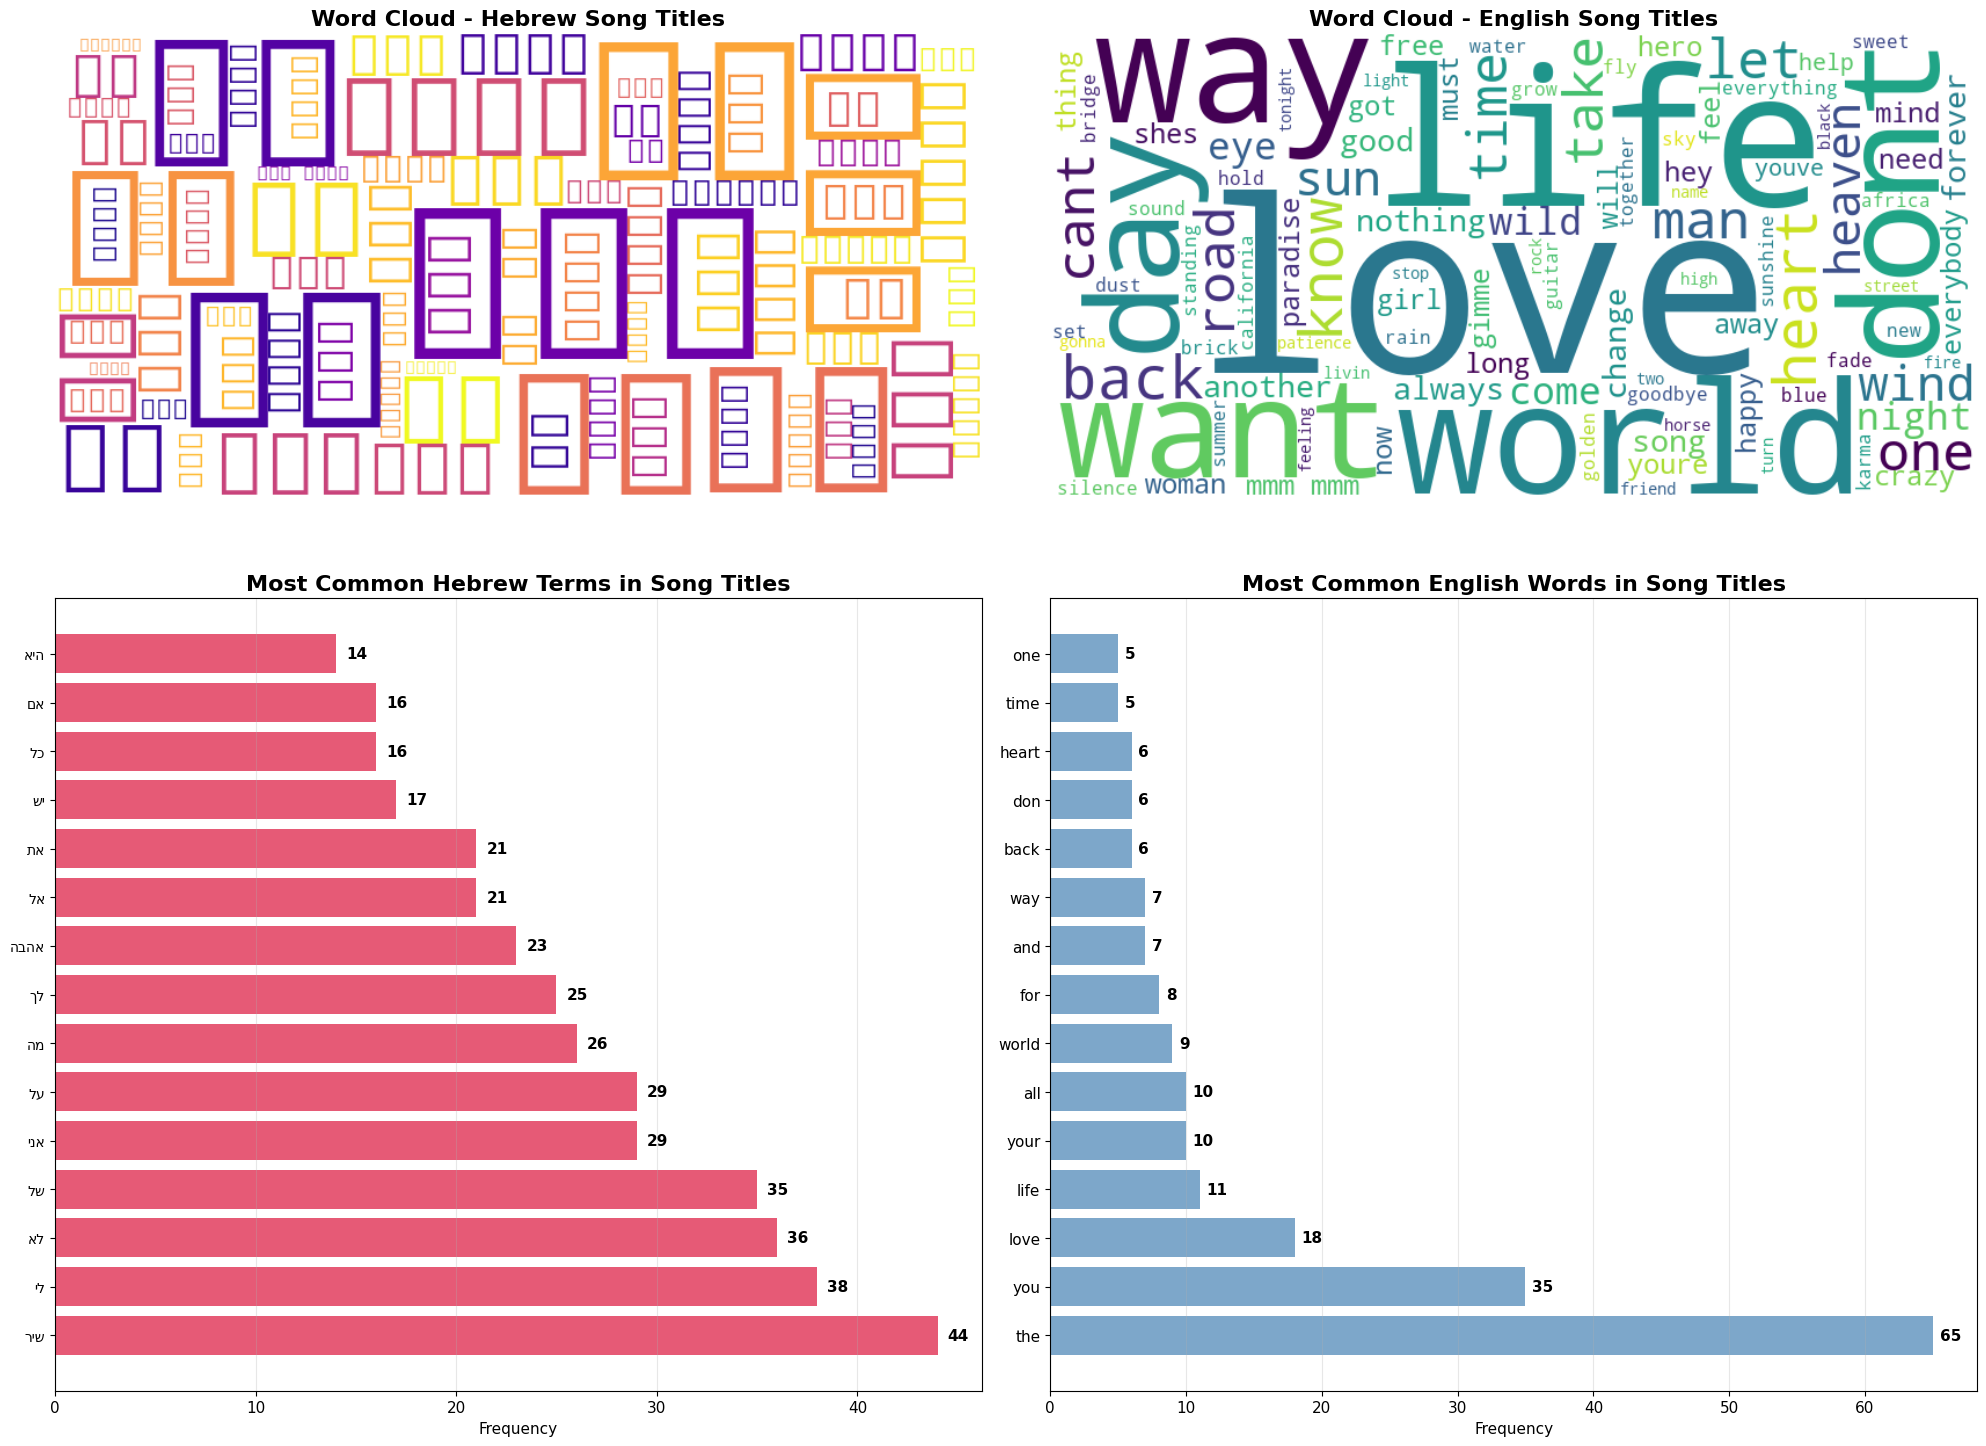

📊 Word Analysis Summary:
   • Hebrew songs analyzed: 1170
   • English songs analyzed: 393
   • Unique Hebrew terms: 1621
   • Unique English words: 551


In [43]:
# Word Cloud Analysis - Hebrew & English
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# 1. Hebrew Songs Word Cloud
hebrew_songs = df[df['language'] == 'Hebrew']['name'].dropna()
hebrew_text = ' '.join(hebrew_songs.astype(str))

if hebrew_text.strip():
    # Use a font that supports Hebrew - try different fonts
    try:
        wordcloud_he = WordCloud(width=800, height=400, background_color='white',
                                 colormap='plasma', max_words=80,
                                 font_path=None,  # Let it use system default
                                 relative_scaling=0.5).generate(hebrew_text)
        ax1.imshow(wordcloud_he, interpolation='bilinear')
        ax1.set_title('Word Cloud - Hebrew Song Titles', fontsize=16, fontweight='bold')
        ax1.axis('off')
    except Exception as e:
        ax1.text(0.5, 0.5, f'Hebrew Word Cloud\n(Font issue: {str(e)[:50]}...)', 
                 ha='center', va='center', transform=ax1.transAxes, fontsize=14)
        ax1.set_title('Word Cloud - Hebrew Song Titles', fontsize=16, fontweight='bold')
        ax1.axis('off')
else:
    ax1.text(0.5, 0.5, 'No Hebrew text available', ha='center', va='center', 
             transform=ax1.transAxes, fontsize=16)
    ax1.set_title('Word Cloud - Hebrew Song Titles', fontsize=16, fontweight='bold')
    ax1.axis('off')

# 2. English Songs Word Cloud
english_songs = df[df['language'] == 'English']['name'].dropna()
english_text = ' '.join(english_songs.astype(str))

# Clean text for word cloud
english_text = re.sub(r'[^a-zA-Z\s]', '', english_text.lower())
english_text = re.sub(r'\b\w{1,2}\b', '', english_text)  # Remove very short words

if english_text.strip():
    wordcloud_en = WordCloud(width=800, height=400, background_color='white',
                             colormap='viridis', max_words=100).generate(english_text)
    ax2.imshow(wordcloud_en, interpolation='bilinear')
    ax2.set_title('Word Cloud - English Song Titles', fontsize=16, fontweight='bold')
    ax2.axis('off')
else:
    ax2.text(0.5, 0.5, 'No English text available', ha='center', va='center', 
             transform=ax2.transAxes, fontsize=16)
    ax2.set_title('Word Cloud - English Song Titles', fontsize=16, fontweight='bold')
    ax2.axis('off')

# 3. Most Common Hebrew Words/Terms
hebrew_word_counts = {}
for title in hebrew_songs:
    # Split Hebrew titles by spaces and count terms
    words = str(title).split()
    for word in words:
        if len(word) >= 2:  # Only words 2+ chars
            hebrew_word_counts[word] = hebrew_word_counts.get(word, 0) + 1

if hebrew_word_counts:
    # Get top 15 Hebrew terms
    common_hebrew = sorted(hebrew_word_counts.items(), key=lambda x: x[1], reverse=True)[:15]
    words, counts = zip(*common_hebrew)
    
    # Fix Hebrew text for display
    fixed_words = fix_labels_list(words)
    
    bars = ax3.barh(range(len(words)), counts, color='crimson', alpha=0.7)
    ax3.set_yticks(range(len(words)))
    ax3.set_yticklabels(fixed_words, fontsize=10)
    ax3.set_xlabel('Frequency')
    ax3.set_title('Most Common Hebrew Terms in Song Titles', fontsize=16, fontweight='bold')
    ax3.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (bar, count) in enumerate(zip(bars, counts)):
        ax3.text(count + 0.5, i, str(count), va='center', fontweight='bold')
else:
    ax3.text(0.5, 0.5, 'No Hebrew terms found', ha='center', va='center',
             transform=ax3.transAxes, fontsize=16)
    ax3.set_title('Most Common Hebrew Terms in Song Titles', fontsize=16, fontweight='bold')

# 4. Most Common English Words Bar Chart
english_words = []
for title in english_songs:
    words = re.findall(r'\b[a-zA-Z]{3,}\b', str(title).lower())  # Only words 3+ chars
    english_words.extend(words)

if english_words:
    common_words = Counter(english_words).most_common(15)
    words, counts = zip(*common_words)
    
    bars = ax4.barh(range(len(words)), counts, color='steelblue', alpha=0.7)
    ax4.set_yticks(range(len(words)))
    ax4.set_yticklabels(words)
    ax4.set_xlabel('Frequency')
    ax4.set_title('Most Common English Words in Song Titles', fontsize=16, fontweight='bold')
    ax4.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (bar, count) in enumerate(zip(bars, counts)):
        ax4.text(count + 0.5, i, str(count), va='center', fontweight='bold')
else:
    ax4.text(0.5, 0.5, 'No English words found', ha='center', va='center',
             transform=ax4.transAxes, fontsize=16)
    ax4.set_title('Most Common English Words in Song Titles', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"📊 Word Analysis Summary:")
print(f"   • Hebrew songs analyzed: {len(hebrew_songs)}")
print(f"   • English songs analyzed: {len(english_songs)}")
if hebrew_word_counts:
    print(f"   • Unique Hebrew terms: {len(hebrew_word_counts)}")
if english_words:
    print(f"   • Unique English words: {len(set(english_words))}")


## 5. Advanced Analysis & Correlations


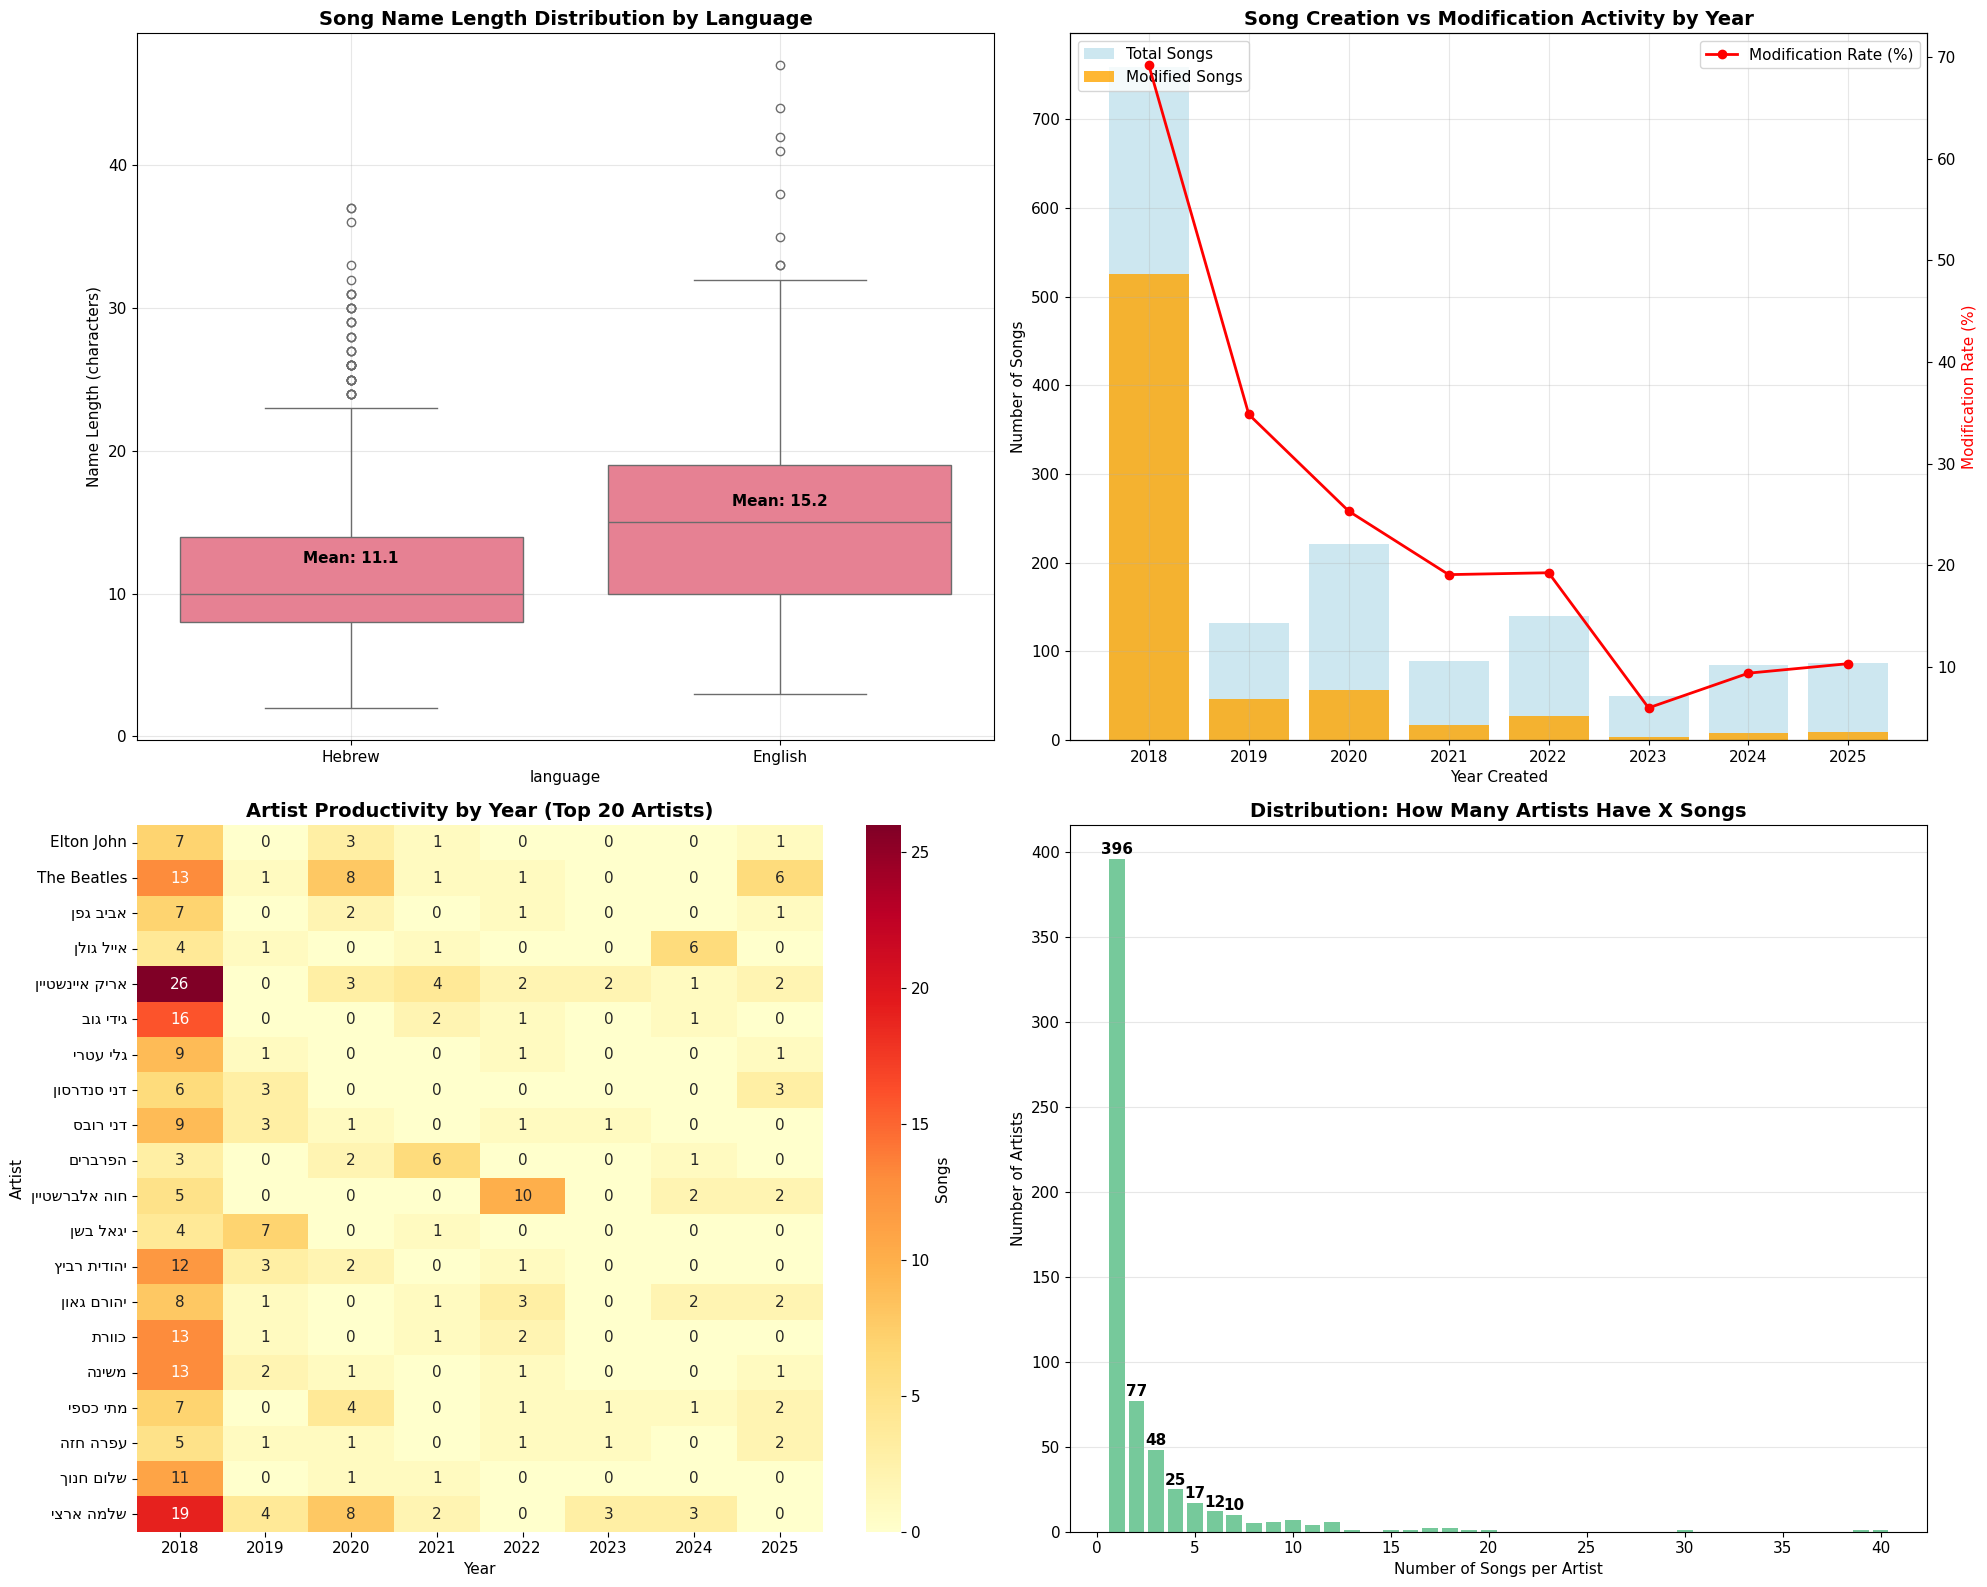

In [44]:
# Advanced Analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# 1. Song Name Length by Language
sns.boxplot(data=df, x='language', y='name_length', ax=ax1)
ax1.set_title('Song Name Length Distribution by Language', fontsize=14, fontweight='bold')
ax1.set_ylabel('Name Length (characters)')
ax1.grid(alpha=0.3)

# Add statistical annotations
hebrew_mean = df[df['language'] == 'Hebrew']['name_length'].mean()
english_mean = df[df['language'] == 'English']['name_length'].mean()
ax1.text(0, hebrew_mean + 1, f'Mean: {hebrew_mean:.1f}', ha='center', fontweight='bold')
ax1.text(1, english_mean + 1, f'Mean: {english_mean:.1f}', ha='center', fontweight='bold')

# 2. Creation Year vs Modification Activity
modification_by_year = df.groupby('year_created').agg({
    'days_to_modify': ['count', lambda x: (x > 0).sum()]
}).round(2)
modification_by_year.columns = ['Total Songs', 'Modified Songs']
modification_by_year['Modification Rate'] = (modification_by_year['Modified Songs'] / 
                                           modification_by_year['Total Songs'] * 100)

ax2_twin = ax2.twinx()
bars1 = ax2.bar(modification_by_year.index, modification_by_year['Total Songs'], 
                alpha=0.6, label='Total Songs', color='lightblue')
bars2 = ax2.bar(modification_by_year.index, modification_by_year['Modified Songs'], 
                alpha=0.8, label='Modified Songs', color='orange')
line = ax2_twin.plot(modification_by_year.index, modification_by_year['Modification Rate'], 
                    'ro-', linewidth=2, markersize=6, label='Modification Rate (%)')

ax2.set_xlabel('Year Created')
ax2.set_ylabel('Number of Songs')
ax2_twin.set_ylabel('Modification Rate (%)', color='red')
ax2.set_title('Song Creation vs Modification Activity by Year', fontsize=14, fontweight='bold')
ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')
ax2.grid(alpha=0.3)

# 3. Artist Productivity Heatmap (Top 20 artists by years)
# Get top 20 artists
top_20_artists = df['singer'].value_counts().head(20).index
artist_year_data = df[df['singer'].isin(top_20_artists)]

# Create pivot table
heatmap_data = artist_year_data.pivot_table(values='id', index='singer', 
                                           columns='year_created', 
                                           aggfunc='count', fill_value=0)

# Fix Hebrew text in artist names for heatmap
fixed_artist_index = fix_labels_list(heatmap_data.index)
heatmap_data_fixed = heatmap_data.copy()
heatmap_data_fixed.index = fixed_artist_index

# Plot heatmap
sns.heatmap(heatmap_data_fixed, annot=True, fmt='d', cmap='YlOrRd', ax=ax3, cbar_kws={'label': 'Songs'})
ax3.set_title('Artist Productivity by Year (Top 20 Artists)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Year')
ax3.set_ylabel('Artist')

# 4. Distribution of Songs per Artist
songs_per_artist = df['singer'].value_counts()
distribution = songs_per_artist.value_counts().sort_index()

ax4.bar(distribution.index, distribution.values, color='mediumseagreen', alpha=0.7)
ax4.set_xlabel('Number of Songs per Artist')
ax4.set_ylabel('Number of Artists')
ax4.set_title('Distribution: How Many Artists Have X Songs', fontsize=14, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

# Add annotations for key points
for i, (songs, artists) in enumerate(distribution.items()):
    if songs <= 5 or artists >= 10:  # Annotate first 5 categories or high values
        ax4.text(songs, artists + 1, str(artists), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


## 6. Contributor Analysis (Alon vs Ophir)


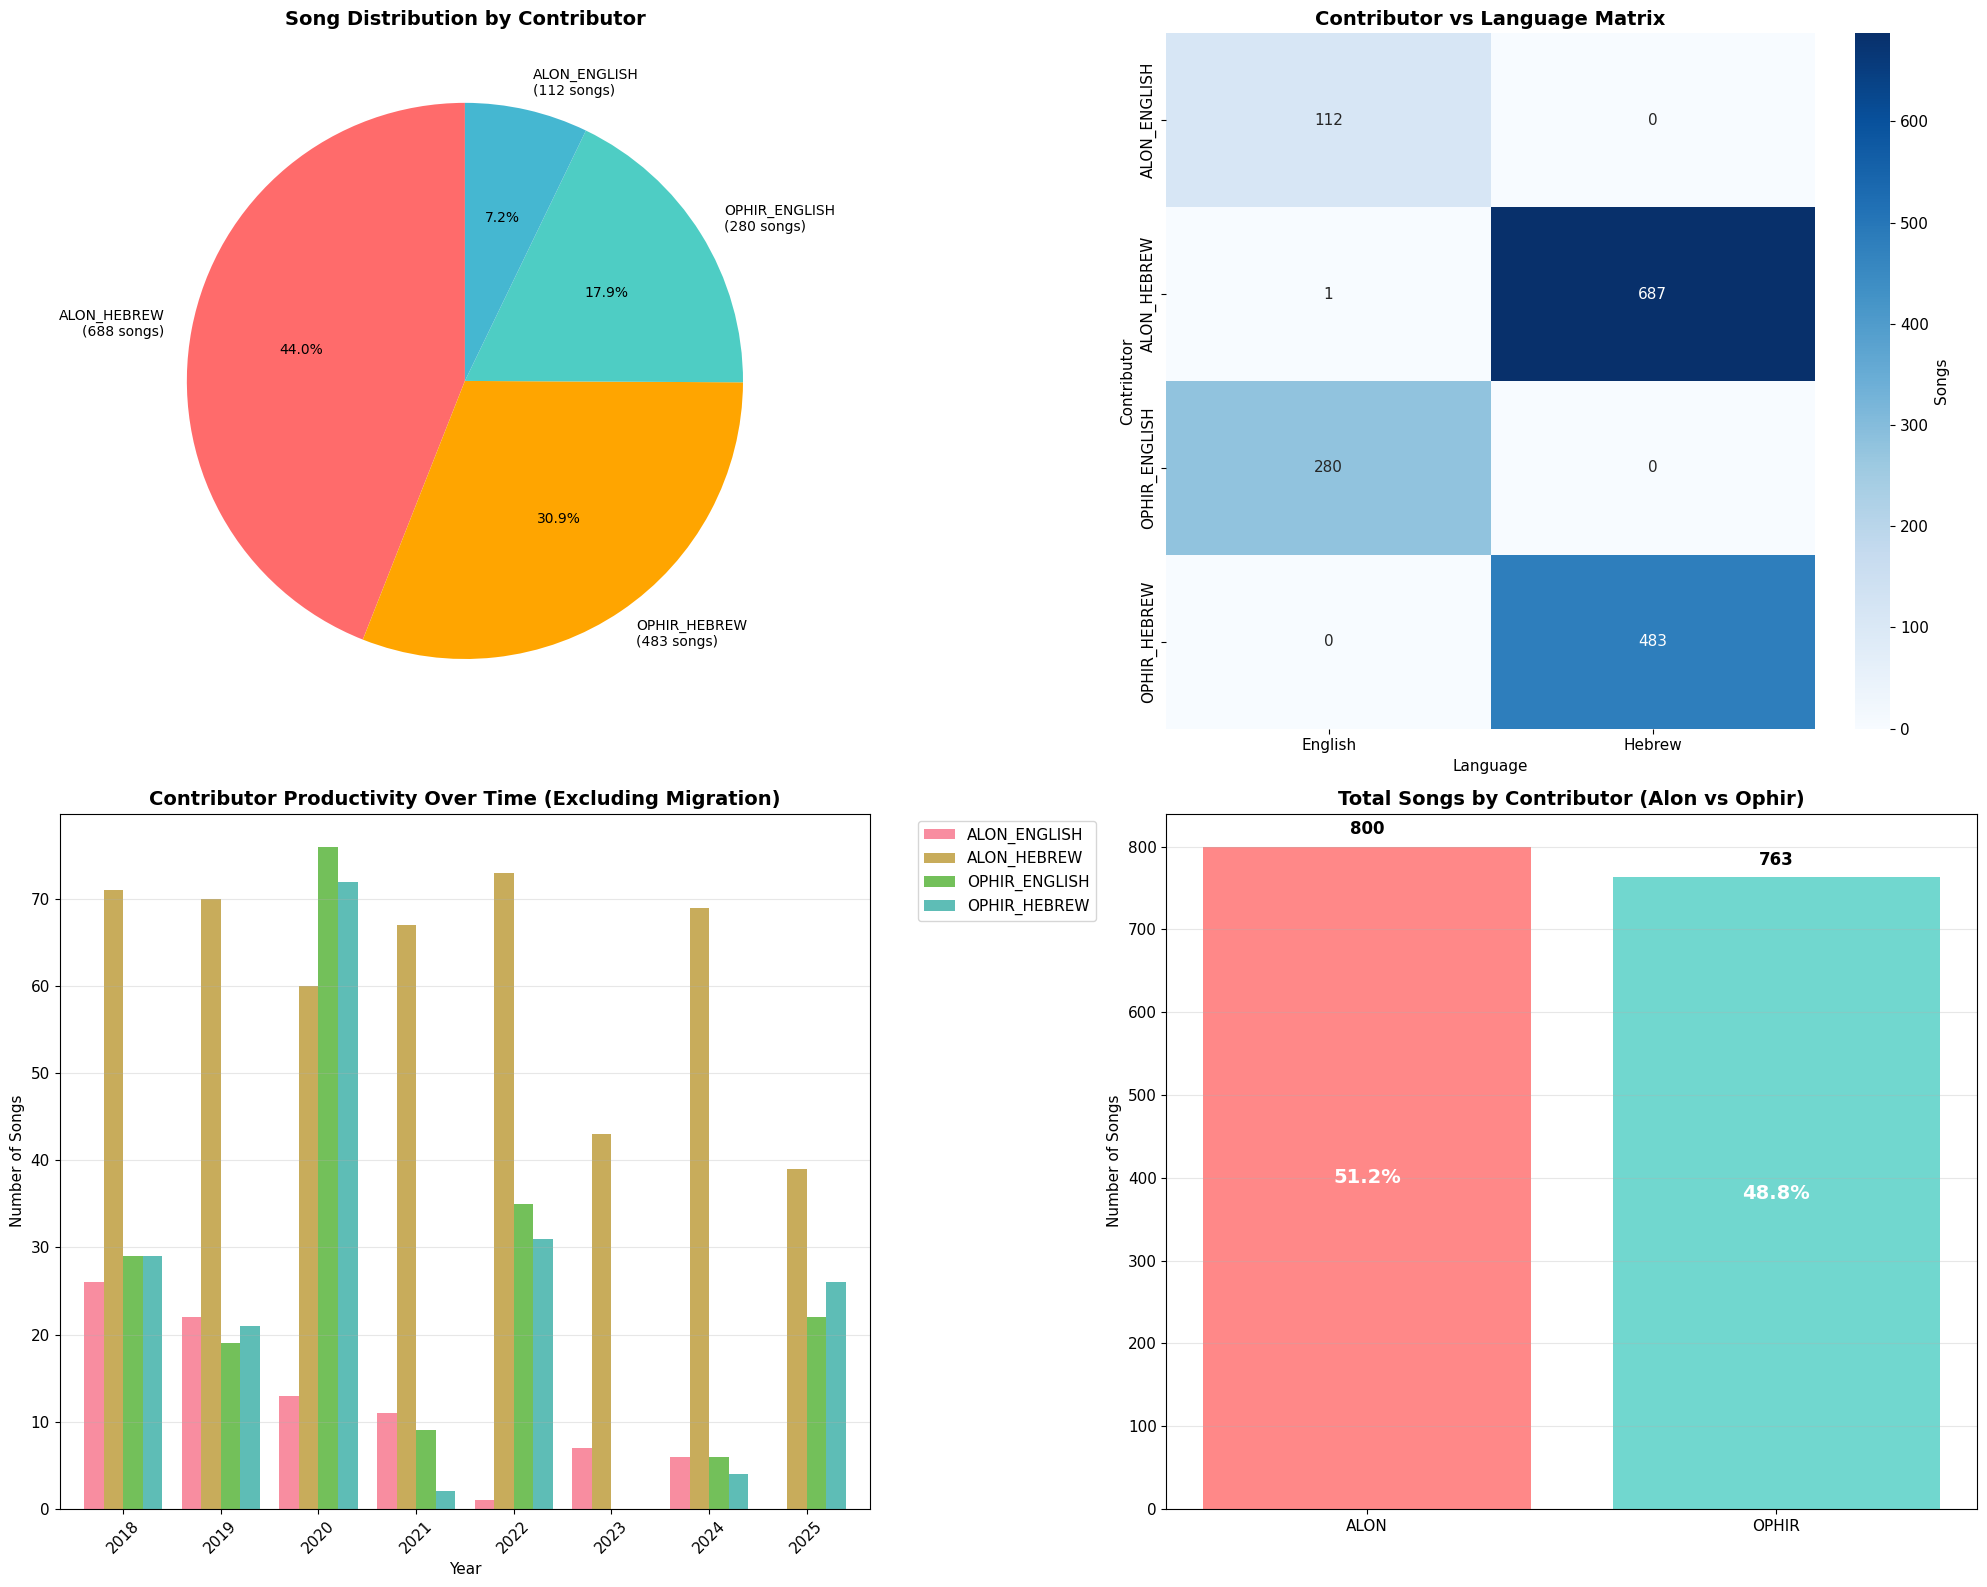

📊 CONTRIBUTOR ANALYSIS SUMMARY

👥 Overall Contribution:
   • Alon: 800 songs (51.2%)
   • Ophir: 763 songs (48.8%)
   • Unknown: 0 songs

📝 Breakdown by Category:
   • ALON_HEBREW: 688 songs (44.0%)
   • OPHIR_HEBREW: 483 songs (30.9%)
   • OPHIR_ENGLISH: 280 songs (17.9%)
   • ALON_ENGLISH: 112 songs (7.2%)

🌍 Language Preferences:
   • Alon: 86.0% Hebrew, 14.0% English
   • Ophir: 63.3% Hebrew, 36.7% English


In [45]:
# Contributor Analysis: Alon vs Ophir
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# 1. Overall Contributor Distribution
contributor_counts = df['contributor'].value_counts()
# Group unknown categories
main_contributors = contributor_counts[contributor_counts.index.isin(['ALON_HEBREW', 'ALON_ENGLISH', 'OPHIR_HEBREW', 'OPHIR_ENGLISH'])]
unknown_total = contributor_counts[~contributor_counts.index.isin(['ALON_HEBREW', 'ALON_ENGLISH', 'OPHIR_HEBREW', 'OPHIR_ENGLISH'])].sum()

# Create pie chart
labels = list(main_contributors.index)
sizes = list(main_contributors.values)
if unknown_total > 0:
    labels.append('UNKNOWN')
    sizes.append(unknown_total)

colors = ['#ff6b6b', '#ffa500', '#4ecdc4', '#45b7d1', '#96ceb4'][:len(labels)]
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
                                   startangle=90, textprops={'fontsize': 10})
ax1.set_title('Song Distribution by Contributor', fontsize=14, fontweight='bold')

# Add counts to labels
for i, (label, size) in enumerate(zip(labels, sizes)):
    texts[i].set_text(f'{label}\n({size} songs)')

# 2. Contributor vs Language Matrix
contributor_language = pd.crosstab(df['contributor'], df['language'], margins=True)
# Remove unknown categories for cleaner visualization
main_matrix = contributor_language.loc[contributor_language.index.isin(['ALON_HEBREW', 'ALON_ENGLISH', 'OPHIR_HEBREW', 'OPHIR_ENGLISH'])]
main_matrix = main_matrix.drop('All', axis=1)  # Remove margins

sns.heatmap(main_matrix, annot=True, fmt='d', cmap='Blues', ax=ax2, cbar_kws={'label': 'Songs'})
ax2.set_title('Contributor vs Language Matrix', fontsize=14, fontweight='bold')
ax2.set_xlabel('Language')
ax2.set_ylabel('Contributor')

# 3. Contributor Productivity Over Time (excluding migration day)
non_migration_contrib = df[~df['is_migration_day']].copy()
yearly_contributor = non_migration_contrib.groupby(['year_created', 'contributor']).size().unstack(fill_value=0)

# Filter to main contributors
main_contrib_cols = [col for col in yearly_contributor.columns if col in ['ALON_HEBREW', 'ALON_ENGLISH', 'OPHIR_HEBREW', 'OPHIR_ENGLISH']]
yearly_main = yearly_contributor[main_contrib_cols]

yearly_main.plot(kind='bar', ax=ax3, width=0.8, alpha=0.8)
ax3.set_title('Contributor Productivity Over Time (Excluding Migration)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Year')
ax3.set_ylabel('Number of Songs')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.grid(axis='y', alpha=0.3)
ax3.tick_params(axis='x', rotation=45)

# 4. Contributor Comparison: Alon vs Ophir (Aggregated)
# Group by person regardless of language
df['contributor_person'] = df['contributor'].apply(lambda x: 'ALON' if 'ALON' in x else ('OPHIR' if 'OPHIR' in x else 'UNKNOWN'))
person_stats = df['contributor_person'].value_counts()

# Create comparison chart
main_persons = person_stats[person_stats.index.isin(['ALON', 'OPHIR'])]
bars = ax4.bar(main_persons.index, main_persons.values, color=['#ff6b6b', '#4ecdc4'], alpha=0.8)
ax4.set_title('Total Songs by Contributor (Alon vs Ophir)', fontsize=14, fontweight='bold')
ax4.set_ylabel('Number of Songs')
ax4.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, main_persons.values):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             str(value), ha='center', va='bottom', fontweight='bold', fontsize=12)

# Add percentage labels
total_main = main_persons.sum()
for i, (bar, value) in enumerate(zip(bars, main_persons.values)):
    percentage = value / total_main * 100
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, 
             f'{percentage:.1f}%', ha='center', va='center', fontweight='bold', fontsize=14, color='white')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("📊 CONTRIBUTOR ANALYSIS SUMMARY")
print("=" * 50)
alon_total = person_stats.get('ALON', 0)
ophir_total = person_stats.get('OPHIR', 0)
total_known = alon_total + ophir_total

print(f"\n👥 Overall Contribution:")
print(f"   • Alon: {alon_total} songs ({alon_total/len(df)*100:.1f}%)")
print(f"   • Ophir: {ophir_total} songs ({ophir_total/len(df)*100:.1f}%)")
print(f"   • Unknown: {person_stats.get('UNKNOWN', 0)} songs")

print(f"\n📝 Breakdown by Category:")
for contributor, count in main_contributors.items():
    print(f"   • {contributor}: {count} songs ({count/len(df)*100:.1f}%)")

# Language preferences
alon_hebrew = df[df['contributor'] == 'ALON_HEBREW'].shape[0]
alon_english = df[df['contributor'] == 'ALON_ENGLISH'].shape[0]
ophir_hebrew = df[df['contributor'] == 'OPHIR_HEBREW'].shape[0]
ophir_english = df[df['contributor'] == 'OPHIR_ENGLISH'].shape[0]

print(f"\n🌍 Language Preferences:")
if alon_total > 0:
    print(f"   • Alon: {alon_hebrew/alon_total*100:.1f}% Hebrew, {alon_english/alon_total*100:.1f}% English")
if ophir_total > 0:
    print(f"   • Ophir: {ophir_hebrew/ophir_total*100:.1f}% Hebrew, {ophir_english/ophir_total*100:.1f}% English")


## 7. Advanced Contributor Insights


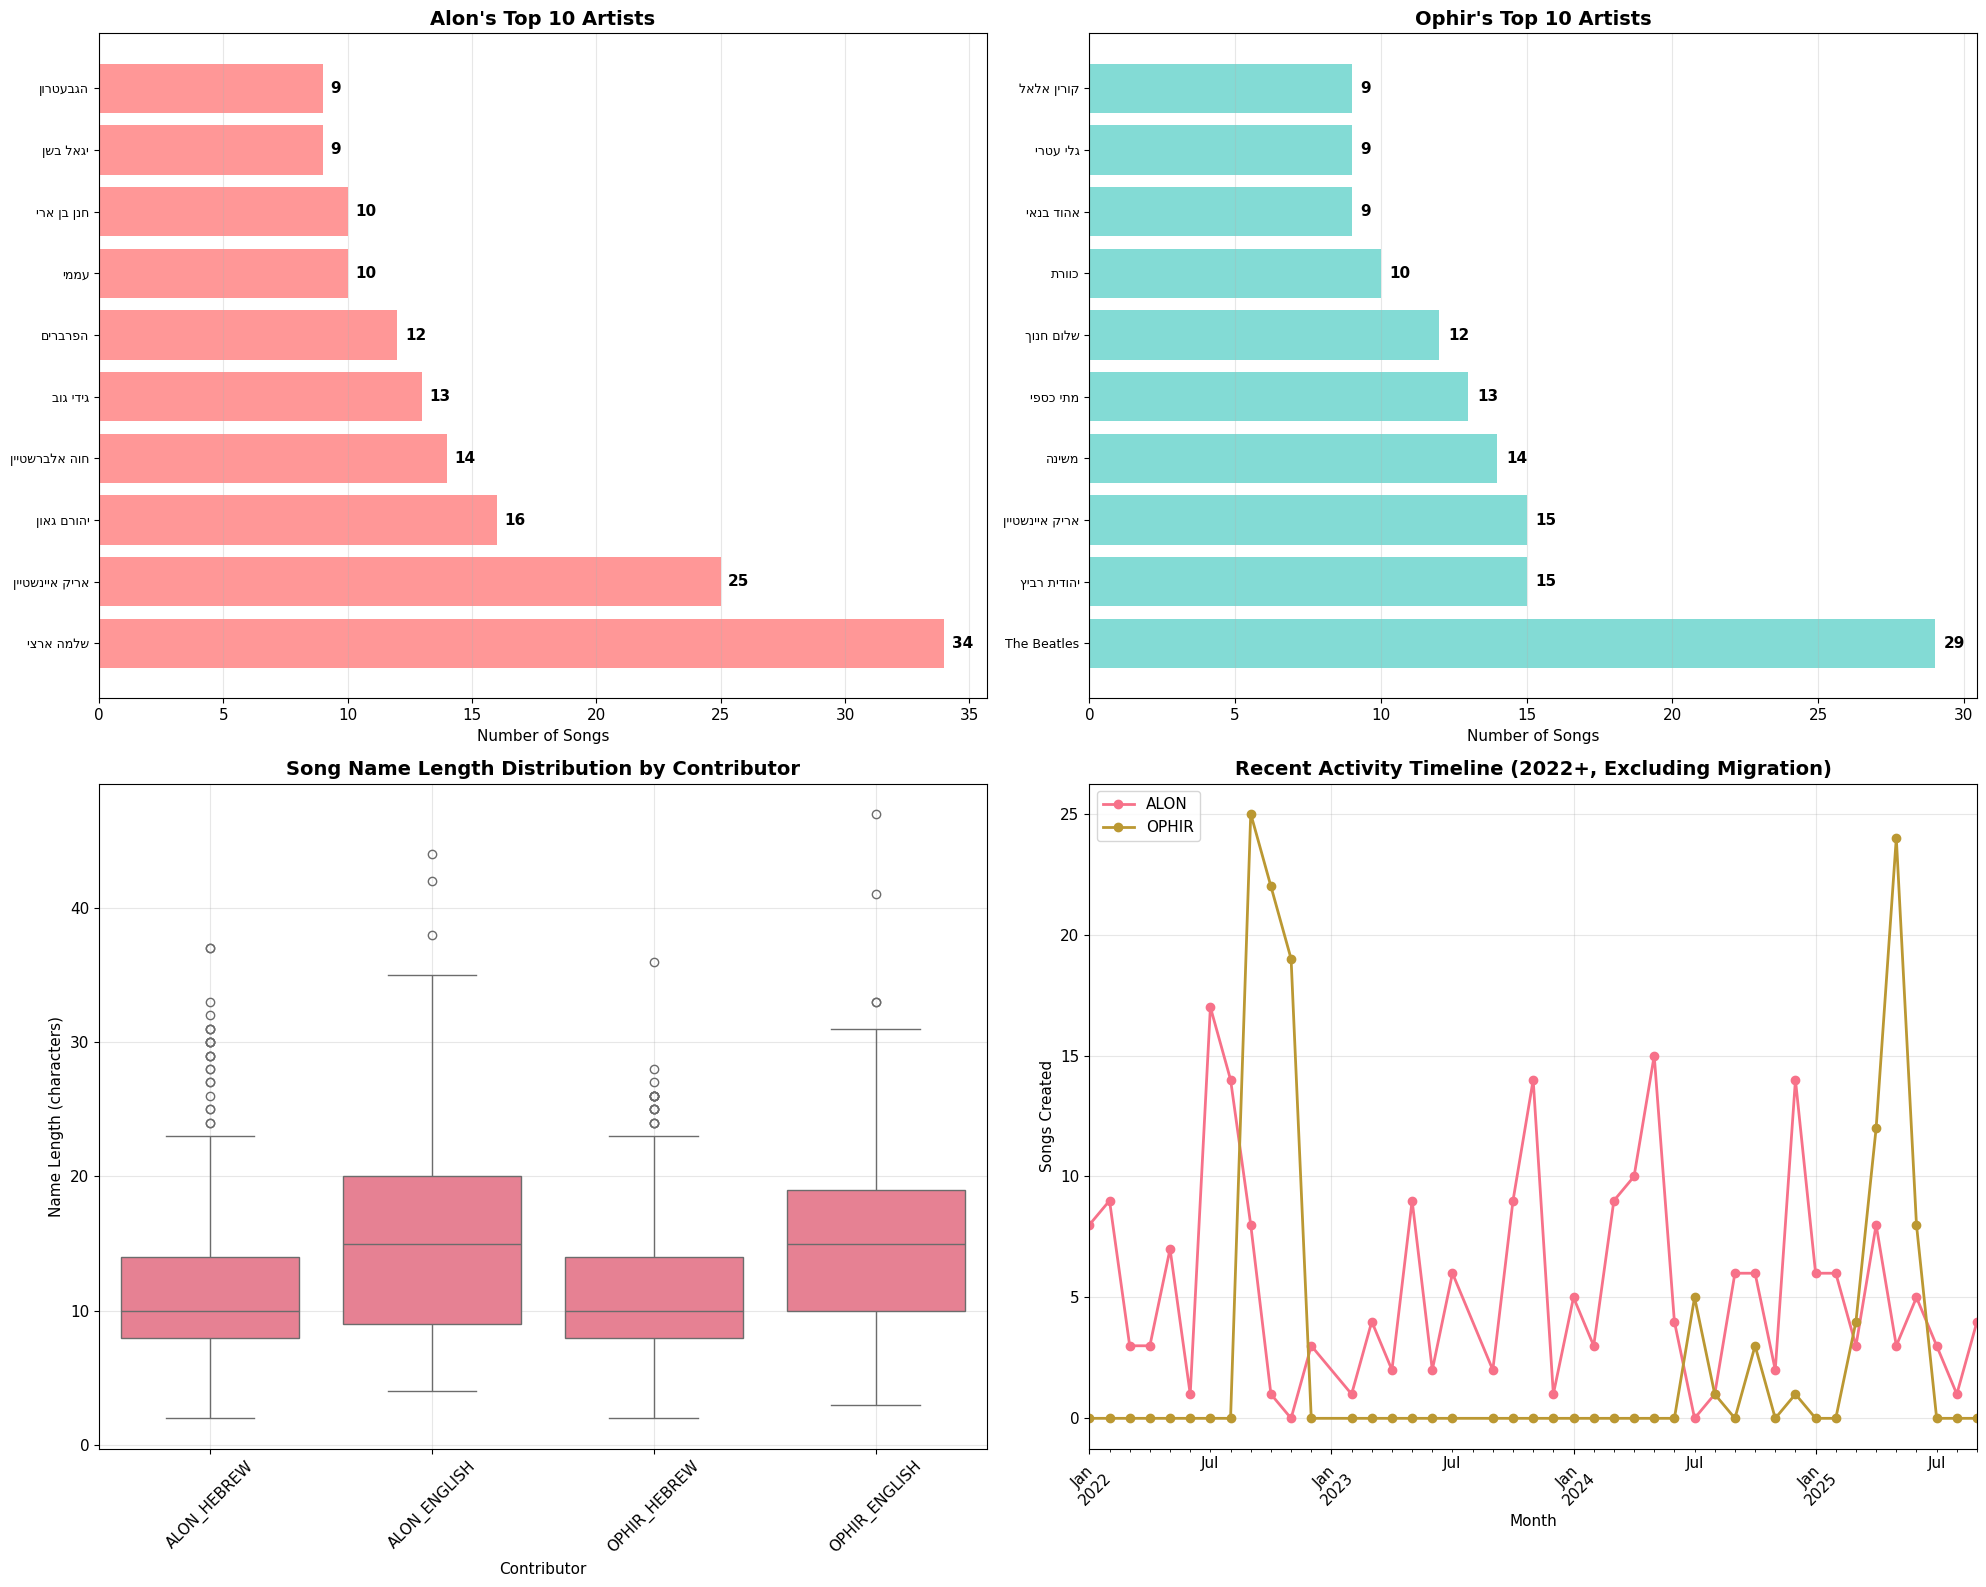

🔍 ADVANCED CONTRIBUTOR INSIGHTS

📏 Average Song Name Length:
   • ALON_HEBREW: 11.1 characters
   • ALON_ENGLISH: 15.5 characters
   • OPHIR_HEBREW: 11.1 characters
   • OPHIR_ENGLISH: 15.0 characters

🎤 Unique Artists:
   • Alon: 355 unique artists
   • Ophir: 384 unique artists

📅 Most Recent Activity:
   • Alon: September 13, 2025
   • Ophir: June 02, 2025

🔄 Migration Day Contribution:
   • Alon: 222 songs migrated
   • Ophir: 382 songs migrated


In [46]:
# Advanced Contributor Analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# 1. Top Artists by Contributor
# Get top artists for each main contributor
alon_artists = df[df['contributor_person'] == 'ALON']['singer'].value_counts().head(10)
ophir_artists = df[df['contributor_person'] == 'OPHIR']['singer'].value_counts().head(10)

# Plot Alon's top artists
if len(alon_artists) > 0:
    fixed_alon_artists = fix_labels_list(alon_artists.index)
    bars = ax1.barh(range(len(alon_artists)), alon_artists.values, color='#ff6b6b', alpha=0.7)
    ax1.set_yticks(range(len(alon_artists)))
    ax1.set_yticklabels(fixed_alon_artists, fontsize=9)
    ax1.set_xlabel('Number of Songs')
    ax1.set_title("Alon's Top 10 Artists", fontsize=14, fontweight='bold')
    ax1.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (bar, value) in enumerate(zip(bars, alon_artists.values)):
        ax1.text(value + 0.3, i, str(value), va='center', fontweight='bold')

# Plot Ophir's top artists
if len(ophir_artists) > 0:
    fixed_ophir_artists = fix_labels_list(ophir_artists.index)
    bars = ax2.barh(range(len(ophir_artists)), ophir_artists.values, color='#4ecdc4', alpha=0.7)
    ax2.set_yticks(range(len(ophir_artists)))
    ax2.set_yticklabels(fixed_ophir_artists, fontsize=9)
    ax2.set_xlabel('Number of Songs')
    ax2.set_title("Ophir's Top 10 Artists", fontsize=14, fontweight='bold')
    ax2.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (bar, value) in enumerate(zip(bars, ophir_artists.values)):
        ax2.text(value + 0.3, i, str(value), va='center', fontweight='bold')

# 3. Song Name Length by Contributor
contributor_lengths = []
contributors = []
for contributor in ['ALON_HEBREW', 'ALON_ENGLISH', 'OPHIR_HEBREW', 'OPHIR_ENGLISH']:
    if contributor in df['contributor'].values:
        lengths = df[df['contributor'] == contributor]['name_length'].tolist()
        contributor_lengths.extend(lengths)
        contributors.extend([contributor] * len(lengths))

if contributor_lengths:
    length_df = pd.DataFrame({'contributor': contributors, 'name_length': contributor_lengths})
    sns.boxplot(data=length_df, x='contributor', y='name_length', ax=ax3)
    ax3.set_title('Song Name Length Distribution by Contributor', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Contributor')
    ax3.set_ylabel('Name Length (characters)')
    ax3.tick_params(axis='x', rotation=45)
    ax3.grid(alpha=0.3)

# 4. Creation Activity Timeline (last 3 years, excluding migration)
recent_df = df[~df['is_migration_day'] & (df['year_created'] >= 2022)].copy()
if not recent_df.empty:
    # Create monthly timeline
    recent_df['year_month'] = recent_df['dateCreated_dt'].dt.to_period('M')
    monthly_activity = recent_df.groupby(['year_month', 'contributor_person']).size().unstack(fill_value=0)
    
    # Plot only main contributors
    main_cols = [col for col in ['ALON', 'OPHIR'] if col in monthly_activity.columns]
    if main_cols:
        monthly_main = monthly_activity[main_cols]
        monthly_main.plot(kind='line', ax=ax4, marker='o', linewidth=2, markersize=6)
        ax4.set_title('Recent Activity Timeline (2022+, Excluding Migration)', fontsize=14, fontweight='bold')
        ax4.set_xlabel('Month')
        ax4.set_ylabel('Songs Created')
        ax4.legend()
        ax4.grid(alpha=0.3)
        ax4.tick_params(axis='x', rotation=45)
    else:
        ax4.text(0.5, 0.5, 'No recent activity data available', ha='center', va='center',
                 transform=ax4.transAxes, fontsize=14)
        ax4.set_title('Recent Activity Timeline', fontsize=14, fontweight='bold')
else:
    ax4.text(0.5, 0.5, 'No recent data available', ha='center', va='center',
             transform=ax4.transAxes, fontsize=14)
    ax4.set_title('Recent Activity Timeline', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Additional insights
print("🔍 ADVANCED CONTRIBUTOR INSIGHTS")
print("=" * 50)

# Average song name length by contributor
print(f"\n📏 Average Song Name Length:")
for contributor in ['ALON_HEBREW', 'ALON_ENGLISH', 'OPHIR_HEBREW', 'OPHIR_ENGLISH']:
    if contributor in df['contributor'].values:
        avg_length = df[df['contributor'] == contributor]['name_length'].mean()
        print(f"   • {contributor}: {avg_length:.1f} characters")

# Unique artists by contributor
alon_unique_artists = df[df['contributor_person'] == 'ALON']['singer'].nunique()
ophir_unique_artists = df[df['contributor_person'] == 'OPHIR']['singer'].nunique()

print(f"\n🎤 Unique Artists:")
print(f"   • Alon: {alon_unique_artists} unique artists")
print(f"   • Ophir: {ophir_unique_artists} unique artists")

# Most recent activity
alon_recent = df[df['contributor_person'] == 'ALON']['dateCreated_dt'].max()
ophir_recent = df[df['contributor_person'] == 'OPHIR']['dateCreated_dt'].max()

print(f"\n📅 Most Recent Activity:")
if pd.notna(alon_recent):
    print(f"   • Alon: {alon_recent.strftime('%B %d, %Y')}")
if pd.notna(ophir_recent):
    print(f"   • Ophir: {ophir_recent.strftime('%B %d, %Y')}")

# Migration day contribution
alon_migration = df[(df['contributor_person'] == 'ALON') & (df['is_migration_day'])].shape[0]
ophir_migration = df[(df['contributor_person'] == 'OPHIR') & (df['is_migration_day'])].shape[0]

print(f"\n🔄 Migration Day Contribution:")
print(f"   • Alon: {alon_migration} songs migrated")
print(f"   • Ophir: {ophir_migration} songs migrated")


## 8. Comprehensive Summary & Final Insights


In [47]:
# Comprehensive Summary Statistics
print("=" * 80)
print("COMPREHENSIVE SONGS DATABASE ANALYSIS SUMMARY")
print("=" * 80)

print(f"\n📊 OVERALL STATISTICS:")
print(f"   • Total Songs: {len(df):,}")
print(f"   • Unique Artists: {df['singer'].nunique():,}")
print(f"   • Date Range: {df['year_created'].min()} - {df['year_created'].max()}")
print(f"   • Database Version: {data.get('version', 'Unknown')}")

print(f"\n🎵 LANGUAGE BREAKDOWN:")
for lang, count in df['language'].value_counts().items():
    percentage = count / len(df) * 100
    print(f"   • {lang}: {count:,} songs ({percentage:.1f}%)")

print(f"\n🎤 TOP ARTISTS:")
for i, (artist, count) in enumerate(df['singer'].value_counts().head(5).items(), 1):
    fixed_artist_name = fix_hebrew_text(artist)
    print(f"   {i}. {fixed_artist_name}: {count} songs")

print(f"\n📅 TEMPORAL INSIGHTS:")
yearly_stats = df['year_created'].value_counts().sort_index()
peak_year = yearly_stats.idxmax()
peak_count = yearly_stats.max()
print(f"   • Peak Creation Year: {peak_year} ({peak_count} songs)")
print(f"   • Most Recent Activity: {df['year_created'].max()}")
print(f"   • Average Songs per Year: {len(df) / len(yearly_stats):.1f}")

print(f"\n✏️ MODIFICATION PATTERNS:")
never_modified = len(df[df['days_to_modify'] == 0])
modified_later = len(df[df['days_to_modify'] > 0])
print(f"   • Never Modified: {never_modified:,} songs ({never_modified/len(df)*100:.1f}%)")
print(f"   • Modified Later: {modified_later:,} songs ({modified_later/len(df)*100:.1f}%)")

if modified_later > 0:
    avg_days = df[df['days_to_modify'] > 0]['days_to_modify'].mean()
    print(f"   • Average Time to Modification: {avg_days:.0f} days ({avg_days/365.25:.1f} years)")

print(f"\n📝 SONG NAME INSIGHTS:")
print(f"   • Average Name Length: {df['name_length'].mean():.1f} characters")
print(f"   • Shortest Name: {df['name_length'].min()} characters")
print(f"   • Longest Name: {df['name_length'].max()} characters")

print(f"\n🎯 ARTIST DIVERSITY:")
artist_distribution = df['singer'].value_counts()
single_song_artists = len(artist_distribution[artist_distribution == 1])
multi_song_artists = len(artist_distribution[artist_distribution > 1])
print(f"   • One-Hit Artists: {single_song_artists} ({single_song_artists/len(artist_distribution)*100:.1f}%)")
print(f"   • Multi-Song Artists: {multi_song_artists} ({multi_song_artists/len(artist_distribution)*100:.1f}%)")
print(f"   • Average Songs per Artist: {len(df)/len(artist_distribution):.1f}")

print(f"\n🔍 INTERESTING FINDINGS:")
hebrew_avg_length = df[df['language'] == 'Hebrew']['name_length'].mean()
english_avg_length = df[df['language'] == 'English']['name_length'].mean()
print(f"   • Hebrew songs have {'longer' if hebrew_avg_length > english_avg_length else 'shorter'} names on average")
print(f"     ({hebrew_avg_length:.1f} vs {english_avg_length:.1f} characters)")

# Find most productive recent years (excluding migration)
non_migration_yearly = non_migration_df['year_created'].value_counts().sort_index()
recent_years = non_migration_yearly.tail(3)
most_recent_productive = recent_years.idxmax()
print(f"   • Most productive recent year (excl. migration): {most_recent_productive} ({recent_years.max()} songs)")

# Artist with most varied years
artist_year_spread = df.groupby('singer')['year_created'].nunique().sort_values(ascending=False)
most_consistent = artist_year_spread.iloc[0]
most_consistent_artist = fix_hebrew_text(artist_year_spread.index[0])
print(f"   • Most consistent artist over time: {most_consistent_artist} ({most_consistent} different years)")

# Migration day insights
migration_date_str = MIGRATION_DATE.strftime('%B %d, %Y')
print(f"   • Migration day ({migration_date_str}): {df['is_migration_day'].sum()} songs imported")

# Contributor insights
alon_total = df[df['contributor_person'] == 'ALON'].shape[0]
ophir_total = df[df['contributor_person'] == 'OPHIR'].shape[0]
if alon_total > 0 and ophir_total > 0:
    leader = 'Alon' if alon_total > ophir_total else 'Ophir'
    leader_count = max(alon_total, ophir_total)
    follower_count = min(alon_total, ophir_total)
    difference = abs(alon_total - ophir_total)
    print(f"   • {leader} leads with {leader_count} songs ({difference} more than the other contributor)")

print("\n" + "="*80)


COMPREHENSIVE SONGS DATABASE ANALYSIS SUMMARY

📊 OVERALL STATISTICS:
   • Total Songs: 1,563
   • Unique Artists: 625
   • Date Range: 2018 - 2025
   • Database Version: 2025_09_14

🎵 LANGUAGE BREAKDOWN:
   • Hebrew: 1,170 songs (74.9%)
   • English: 393 songs (25.1%)

🎤 TOP ARTISTS:
   1. ןייטשנייא קירא: 40 songs
   2. יצרא המלש: 39 songs
   3. The Beatles: 30 songs
   4. בוג ידיג: 20 songs
   5. ןייטשרבלא הוח: 19 songs

📅 TEMPORAL INSIGHTS:
   • Peak Creation Year: 2018 (759 songs)
   • Most Recent Activity: 2025
   • Average Songs per Year: 195.4

✏️ MODIFICATION PATTERNS:
   • Never Modified: 869 songs (55.6%)
   • Modified Later: 691 songs (44.2%)
   • Average Time to Modification: 1449 days (4.0 years)

📝 SONG NAME INSIGHTS:
   • Average Name Length: 12.2 characters
   • Shortest Name: 2 characters
   • Longest Name: 47 characters

🎯 ARTIST DIVERSITY:
   • One-Hit Artists: 396 (63.4%)
   • Multi-Song Artists: 229 (36.6%)
   • Average Songs per Artist: 2.5

🔍 INTERESTING FINDINGS:

In [48]:
# Final Data Summary and Export
print("Saving processed data summary...")

# Quick data export for further analysis
summary_stats = {
    'total_songs': len(df),
    'unique_artists': df['singer'].nunique(),
    'language_distribution': df['language'].value_counts().to_dict(),
    'top_artists': df['singer'].value_counts().head(10).to_dict(),
    'yearly_distribution': df['year_created'].value_counts().sort_index().to_dict(),
    'modification_stats': {
        'never_modified': len(df[df['days_to_modify'] == 0]),
        'modified_later': len(df[df['days_to_modify'] > 0])
    }
}

# Display final DataFrame info
print(f"\nDataFrame Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nSample of processed data with formatted dates:")
sample_df = df[['name', 'singer', 'language', 'dateCreated_formatted', 
                'dateModified_formatted', 'year_created', 'name_length']].head(10)
print(sample_df.to_string(index=False))

print("\n" + "="*80)
print("✅ COMPREHENSIVE ANALYSIS COMPLETED SUCCESSFULLY!")
print("🎵 Your songs database contains rich insights about:")
print("   • Music trends over 8 years (2018-2025)")
print("   • Artist productivity and consistency") 
print("   • Language distribution (Hebrew vs English)")
print("   • Song modification patterns")
print("   • Temporal patterns in music creation")
print("   • Contributor analysis (Alon vs Ophir)")
print("   • Migration day vs organic creation patterns")
print("   • Hebrew RTL text support in all visualizations")
print("="*80)

# Enhanced quick stats
print(f"\n🔢 ENHANCED QUICK STATS:")
print(f"Total Songs: {len(df):,} | Artists: {df['singer'].nunique():,} | Years: {df['year_created'].nunique()}")
print(f"Hebrew: {df[df['language']=='Hebrew'].shape[0]} | English: {df[df['language']=='English'].shape[0]}")

# Contributor stats
alon_count = df[df['contributor_person'] == 'ALON'].shape[0]
ophir_count = df[df['contributor_person'] == 'OPHIR'].shape[0]
print(f"Contributors: Alon ({alon_count}) | Ophir ({ophir_count})")

# Migration vs organic
migration_count = df['is_migration_day'].sum()
organic_count = len(df) - migration_count
print(f"Migration vs Organic: {migration_count} migrated | {organic_count} organic")

top_artist_name = fix_hebrew_text(df['singer'].value_counts().index[0])
print(f"Top Artist: {top_artist_name} ({df['singer'].value_counts().iloc[0]} songs)")

# Peak year excluding migration
peak_year_organic = non_migration_df['year_created'].value_counts().sort_index().idxmax()
peak_count_organic = non_migration_df['year_created'].value_counts().sort_index().max()
print(f"Peak Organic Year: {peak_year_organic} ({peak_count_organic} songs)")

print(f"\n📊 ANALYSIS FEATURES:")
print(f"   ✅ Hebrew RTL text support - Hebrew names display correctly")
print(f"   ✅ Migration day filtering - Temporal analysis excludes Feb 25, 2018")
print(f"   ✅ Contributor detection - 4 categories: ALON/OPHIR × HEBREW/ENGLISH")
print(f"   ✅ Enhanced word clouds - Both Hebrew and English song titles")
print(f"   ✅ Comprehensive visualizations - 8 sections, 20+ charts")

print(f"\n📈 DataFrame 'df' includes all analysis columns and is ready for further exploration!")
print(f"🎯 Key columns: name, singer, language, contributor, contributor_person, is_migration_day")


Saving processed data summary...

DataFrame Shape: (1563, 20)
Columns: ['id', 'name', 'singer', 'dateCreated', 'dateModified', 'categoryIds', 'markupUrl', 'imageUrl', 'dateCreated_formatted', 'dateModified_formatted', 'dateCreated_dt', 'dateModified_dt', 'is_migration_day', 'has_hebrew', 'language', 'contributor', 'name_length', 'year_created', 'days_to_modify', 'contributor_person']

Sample of processed data with formatted dates:
             name       singer language dateCreated_formatted dateModified_formatted  year_created  name_length
       בך לא נוגע  יהודית רביץ   Hebrew                060319                 060319          2019           10
    חלומות שמורים     מתי כספי   Hebrew                250218                 280720          2018           13
    משחק של דמעות נקמת הטרקטור   Hebrew                250218                 160820          2018           13
בלילות של ירח מלא      ערן צור   Hebrew                250218                 100721          2018           17
     